# Project 1: SAT & ACT Analysis

## Problem Statement

In this Project, I am keen to explore the probable causes of a change in participation rate in ACT and SAT from 2017 to 2018 and look at the probable causes for the shift in participation. 

## Executive Summary

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Imports:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Assigning file path to a variable
sat_2017_csv = '../data/sat_2017.csv'
act_2017_csv = '../data/act_2017.csv'

#Creating pandas dataframe
sat_2017_df = pd.read_csv(sat_2017_csv)
act_2017_df = pd.read_csv(act_2017_csv)

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
sat_2017_df.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
act_2017_df.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer:

1) Number of observations for both dataframes are similar, with an additional observation in ACT data compiling for national level

2) The 'Participation' column has a special character that might affect the EDA of the data

3) The value of scores for SAT columns are significantly bigger than ACT columns. Comparison of difference in scores may not be proportionate.

4) 'State' column on both dataframes are the same alphabetically sorted, with exception of the first value in ACT dataframe. Will help in merging of the dataframes.

#### 4a. Does the data look complete? 

Answer:

1) Data is incomplete for the fact that it is trying to show mainly the average scores by state. It's sufficient to show the desired outcome, which is the data summary by state. However, it is not enough to show other inferences such as the student performance in each individual subject.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

An obvious issue would be that there is a possibility of an overlap in the student taking the two tests. This may not help in figuring out the trend as to why the scores would be better in one exam over the other. There are also sampling issues, whereby certain states make it compulsory for the students to take one exam over the other.

The minimum score for an ACT subject is 1 whereas the maximum possible score is 36.

The minimum score for an SAT subject is 200 whereas the maximum possible score is 800.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [5]:
#code

#### 5. What are your data types? 
Display the data types of each feature. 

In [6]:
sat_2017_df.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [7]:
act_2017_df.dtypes

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

1) The 'Composite' column in act_2017_df is marked as an object rather than a float. Due to the single value labeled as '20.2x'

2) The 'Participation column in both dataframes are also objects which may inhibit exploration of the data in the future.

3) The column headers are not in lowercase format and has spaces

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [8]:
#Defining a function that removes the '%' character from the dataframe
def per_con(x):
    out = float(x.replace("%",""))
    return out

In [9]:
#Applying function
act_2017_df['Participation'] = act_2017_df['Participation'].apply(per_con)

In [10]:
#Applying function
sat_2017_df['Participation'] = sat_2017_df['Participation'].apply(per_con)

- Fix any individual values preventing other columns from being the appropriate type.

In [11]:
#Removing unwanted character
act_2017_df['Composite'] = act_2017_df['Composite'].str.replace('x', '')

#Converting data type to float
act_2017_df = act_2017_df.astype({'Composite': float})

- Finish your data modifications by making sure the columns are now typed appropriately.

In [12]:
#Renaming columns and removing spaces and special characters
sat_2017_df.rename(columns=lambda x: x.replace(' ', '_'), inplace=True)
sat_2017_df.rename(columns=lambda x: x.replace('-', '_'), inplace=True)

- Display the data types again to confirm they are correct.

In [13]:
act_2017_df.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

In [14]:
sat_2017_df.dtypes

State                                  object
Participation                         float64
Evidence_Based_Reading_and_Writing      int64
Math                                    int64
Total                                   int64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [15]:
#Assigning differentiated names and converting to lower case via list comprehension to prepare for merge
sat_2017_df.columns = [(str(col) + '_2017sat').lower() if (col != 'State') else col.lower() for col in sat_2017_df.columns]

In [16]:
#Assigning differentiated names and converting to lower case via list comprehension to prepare for merge
act_2017_df.columns = [(str(col) + '_2017act').lower() if (col != 'State') else col.lower() for col in act_2017_df.columns]

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**state**|object|SAT/ACT| State which the exam took place.|
|**participation_2017sat**|float|SAT|Percentage off the population in the state that participated in the exam (unit 1 = 1%, meaning 61 = 61%|
|**evidence_based_reading_and_writing_2017sat**|float|SAT|Average score of evidence-based reading and writing test of the population by state|
|**math_2017sat**|float|SAT|Average score of math test of the population by state|
|**total_2017sat**|float|SAT|Population mean by state of total scores of all the exams in SAT|
|**participation_2018act**|float|SAT|Percentage off the population in the state that participated in the exam (unit 1 = 1%, meaning 61 = 61%|
|**evidence_based_reading_and_writing_2018sat**|float|SAT|Average score of evidence-based reading and writing test of the population by state|
|**math_2018sat**|float|SAT|Average score of math test of the population by state|
|**total_2018sat**|float|SAT|Population mean by state of total scores of all the exams in SAT|
|**participation_2017act**|float|ACT|Percentage off the population in the state that participated in the exam (unit 1 = 1%, meaning 61 = 61%|
|**english_2017act**|float|ACT|Average score of english test of the population by state|
|**math_2017act**|float|ACT|Average score of math test of the population by state|
|**reading_2017act**|float|ACT|Average score of reading test of the population by state|
|**science_2017act**|float|ACT|Average score of science test of the population by state|
|**composite_2017act**|float|ACT|Population mean by state of composite scores (composite score is the mean of score of all the scores in ACT)|
|**participation_2018act**|float|ACT|Percentage off the population in the state that participated in the exam (unit 1 = 1%, meaning 61 = 61%|
|**english_2018act**|float|ACT|Average score of english test of the population by state|
|**math_2018act**|float|ACT|Average score of math test of the population by state|
|**reading_2018act**|float|ACT|Average score of reading test of the population by state|
|**science_2017act**|float|ACT|Average score of science test of the population by state|
|**composite_2018act**|float|ACT|Population mean by state of composite scores (composite score is the mean of score of all the scores in ACT)|

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [19]:
#Dropping the national aggregation in dataframe
act_2017_df.drop([0],inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [20]:
#Merging the 2 dataframe on the common 'state' variable
combined_2017 = pd.merge(act_2017_df, sat_2017_df, on='state', how='left')

,state,participation_2017act,english_2017act,math_2017act,reading_2017act,science_2017act,composite_2017act,participation_2017sat,evidence_based_reading_and_writing_2017sat,math_2017sat,total_2017sat
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,1165
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,1080
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,1116
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,1208
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,1055


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [21]:
#Saving file and explicitly assigning the file path. Indicating index=False will stop the creation of another index
combined_2017.to_csv(path_or_buf='../data/combined_2017.csv',index=False)


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [22]:
#assigning the file path to a variable
sat_2018_csv = '../data/sat_2018.csv'
act_2018_csv = '../data/act_2018_updated.csv'

#importing the data into a pd dataframe
sat_2018_df = pd.read_csv(sat_2018_csv)
act_2018_df = pd.read_csv(act_2018_csv)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [25]:
#Cleaning the dataframe with the function previously defined
sat_2018_df['Participation'] = sat_2018_df['Participation'].apply(per_con)
#Renaming the columns to be similar to 2017 dataframe
sat_2018_df.columns=sat_2017_df.columns
#Replacing '7' with '8' to assign unique name
sat_2018_df.rename(columns=lambda x: x.replace('7', '8'), inplace=True)
#Printing the head to check
sat_2018_df.head()

,state,participation_2018sat,evidence_based_reading_and_writing_2018sat,math_2018sat,total_2018sat
0,Alabama,6.0,595,571,1166
1,Alaska,43.0,562,544,1106
2,Arizona,29.0,577,572,1149
3,Arkansas,5.0,592,576,1169
4,California,60.0,540,536,1076


In [26]:
#Rearranging the dataframe columns to avoid confusion
act_2018_df = act_2018_df[['State', 'Percentage of Students Tested',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score', 'Average Composite Score']]
#Renaming the columns to be similar to 2017 dataframe
act_2018_df.columns = act_2017_df.columns
#Replacing '7' with '8' to assign unique name
act_2018_df.rename(columns=lambda x: x.replace('7', '8'), inplace=True)
#Printing the head to check
act_2018_df.head()

,state,participation_2018act,english_2018act,math_2018act,reading_2018act,science_2018act,composite_2018act
0,Alabama,100,18.9,18.3,19.6,19.0,19.1
1,Alaska,33,19.8,20.6,21.6,20.7,20.8
2,Arizona,66,18.2,19.4,19.5,19.2,19.2
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4
4,California,27,22.5,22.5,23.0,22.1,22.7


In [27]:
#Merging the 2 2018 dataframe on the common variable 'state'
combined_2018 = pd.merge(act_2018_df, sat_2018_df, on='state', how='left')
#print the head to check
combined_2018.head()

,state,participation_2018act,english_2018act,math_2018act,reading_2018act,science_2018act,composite_2018act,participation_2018sat,evidence_based_reading_and_writing_2018sat,math_2018sat,total_2018sat
0,Alabama,100,18.9,18.3,19.6,19.0,19.1,6.0,595,571,1166
1,Alaska,33,19.8,20.6,21.6,20.7,20.8,43.0,562,544,1106
2,Arizona,66,18.2,19.4,19.5,19.2,19.2,29.0,577,572,1149
3,Arkansas,100,19.1,18.9,19.7,19.4,19.4,5.0,592,576,1169
4,California,27,22.5,22.5,23.0,22.1,22.7,60.0,540,536,1076


In [28]:
#Merging the combined datasets from 2017 and 2018 on common variable 'state'
final_df = pd.merge(combined_2017, combined_2018, on='state', how='left')
#print head to check
final_df.head()

,state,participation_2017act,english_2017act,math_2017act,reading_2017act,science_2017act,composite_2017act,participation_2017sat,evidence_based_reading_and_writing_2017sat,math_2017sat,...,participation_2018act,english_2018act,math_2018act,reading_2018act,science_2018act,composite_2018act,participation_2018sat,evidence_based_reading_and_writing_2018sat,math_2018sat,total_2018sat
0,Alabama,100.0,18.9,18.4,19.7,19.4,19.2,5.0,593,572,...,100,18.9,18.3,19.6,19.0,19.1,6.0,595,571,1166
1,Alaska,65.0,18.7,19.8,20.4,19.9,19.8,38.0,547,533,...,33,19.8,20.6,21.6,20.7,20.8,43.0,562,544,1106
2,Arizona,62.0,18.6,19.8,20.1,19.8,19.7,30.0,563,553,...,66,18.2,19.4,19.5,19.2,19.2,29.0,577,572,1149
3,Arkansas,100.0,18.9,19.0,19.7,19.5,19.4,3.0,614,594,...,100,19.1,18.9,19.7,19.4,19.4,5.0,592,576,1169
4,California,31.0,22.5,22.7,23.1,22.2,22.8,53.0,531,524,...,27,22.5,22.5,23.0,22.1,22.7,60.0,540,536,1076


In [29]:
#Assigning file path and saving dataframe as a csv file
final_df.to_csv(path_or_buf='../data/final.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [30]:
final_df.describe()

,participation_2017act,english_2017act,math_2017act,reading_2017act,science_2017act,composite_2017act,participation_2017sat,evidence_based_reading_and_writing_2017sat,math_2017sat,total_2017sat,participation_2018act,english_2018act,math_2018act,reading_2018act,science_2018act,composite_2018act,participation_2018sat,evidence_based_reading_and_writing_2018sat,math_2018sat,total_2018sat
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,39.803922,569.117647,547.627451,1126.098039,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,35.276632,45.666901,84.909119,92.494812,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,482.000000,52.000000,950.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.000000,533.500000,522.000000,1055.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000,100.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [32]:
#defining function
def std_dev(data,col):
    #summation is the variable that equals the summation of all the squared values
    summation = 0
    #setting n to be the number of observations in the dataframe
    n = len(data)
    for i in range(n):
        #for each observation, the value minus the mean then squared will add into the summation variable
        summation += (data[col][i] - data[col].mean())**2
    #returning the summation divided by number of observations then square rooted
    return (summation/n)**0.5

In [33]:
#calculating the standard deviation with the function above
std_dev(final_df,'participation_2017act')

31.824175751231806

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [34]:
#using dictionary comprehension to assign the standard deviation of each variable as values to the key(which is the columns)
sd = {key: std_dev(final_df,key) for key in final_df.columns.drop('state')}
sd

{'participation_2017act': 31.824175751231806,
 'english_2017act': 2.3304876369363363,
 'math_2017act': 1.9624620273436781,
 'reading_2017act': 2.0469029314842646,
 'science_2017act': 3.151107895464408,
 'composite_2017act': 2.000786081581989,
 'participation_2017sat': 34.92907076664508,
 'evidence_based_reading_and_writing_2017sat': 45.21697020437866,
 'math_2017sat': 84.07255521608297,
 'total_2017sat': 91.58351056778743,
 'participation_2018act': 33.745194881997506,
 'english_2018act': 2.4222536143202795,
 'math_2018act': 2.015707255555717,
 'reading_2018act': 2.145891884510421,
 'science_2018act': 1.8516885484833543,
 'composite_2018act': 2.0855261815801147,
 'participation_2018sat': 36.946619223539415,
 'evidence_based_reading_and_writing_2018sat': 47.03460978357609,
 'math_2018sat': 47.30194550378352,
 'total_2018sat': 93.22742384464433}

In [94]:
#calculating standard deviation with pandas .describe()
final_df.describe()

,participation_2017act,english_2017act,math_2017act,reading_2017act,science_2017act,composite_2017act,participation_2017sat,evidence_based_reading_and_writing_2017sat,math_2017sat,total_2017sat,participation_2018act,english_2018act,math_2018act,reading_2018act,science_2018act,composite_2018act,participation_2018sat,evidence_based_reading_and_writing_2018sat,math_2018sat,total_2018sat
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,39.803922,569.117647,547.627451,1126.098039,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,35.276632,45.666901,84.909119,92.494812,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,482.000000,52.000000,950.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.000000,533.500000,522.000000,1055.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000,100.000000,643.000000,655.000000,1298.000000


In [36]:
#calculating standard deviation with numpy and expliting the degrees of freedom to n-1
np.std(final_df,ddof=1)

participation_2017act                         32.140842
english_2017act                                2.353677
math_2017act                                   1.981989
reading_2017act                                2.067271
science_2017act                                3.182463
composite_2017act                              2.020695
participation_2017sat                         35.276632
evidence_based_reading_and_writing_2017sat    45.666901
math_2017sat                                  84.909119
total_2017sat                                 92.494812
participation_2018act                         34.080976
english_2018act                                2.446356
math_2018act                                   2.035765
reading_2018act                                2.167245
science_2018act                                1.870114
composite_2018act                              2.106278
participation_2018sat                         37.314256
evidence_based_reading_and_writing_2018sat    47

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer

It does not. The calculated standard deviation is meant to calculate the population standard deviation where there is n degrees of freedom whereas the numpy and pandas were made to remove a downward bias by removing 1 observation and have a (n-1) degrees of freedom.


#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [37]:
final_df[['state','participation_2017act']].sort_values(by='participation_2017act',ascending=True).head()

,state,participation_2017act
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0


The above subset shows the states with the 5 lowest participation rate for ACT in 2017

In [38]:
final_df[['state','participation_2017act']].sort_values(by='participation_2017act',ascending=False).head()

,state,participation_2017act
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0


The above subset shows the states with the 5 highest participation rate for ACT in 2017

In [39]:
final_df[['state','participation_2018act']].sort_values(by='participation_2018act',ascending=True).head()

,state,participation_2018act
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20


The above subset shows the states with the 5 lowest participation rate for ACT in 2018

In [40]:
final_df[['participation_2018act']].sort_values(by='participation_2018act',ascending=False).head()

,participation_2018act
0,100
17,100
49,100
44,100
42,100


The above subset shows the states with the 5 highest participation rate for ACT in 2018

In [41]:
final_df[['state','participation_2017sat']].sort_values(by='participation_2017sat',ascending=True).head()

,state,participation_2017sat
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0


The above subset shows the states with the 5 lowest participation rate for SAT in 2017

In [42]:
final_df[['state','participation_2017sat']].sort_values(by='participation_2017sat',ascending=False).head()

,state,participation_2017sat
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


The above subset shows the states with the 5 highest participation rate for SAT in 2017

In [43]:
final_df[['participation_2018sat']].sort_values(by='participation_2018sat',ascending=True).head()

,participation_2018sat
34,2.0
50,3.0
41,3.0
27,3.0
49,3.0


The above subset shows the states with the 5 lowest participation rate for SAT in 2018

In [44]:
final_df[['state','participation_2017sat']].sort_values(by='participation_2017sat',ascending=False).head()

,state,participation_2017sat
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


The above subset shows the states with the 5 highest participation rate for SAT in 2018

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

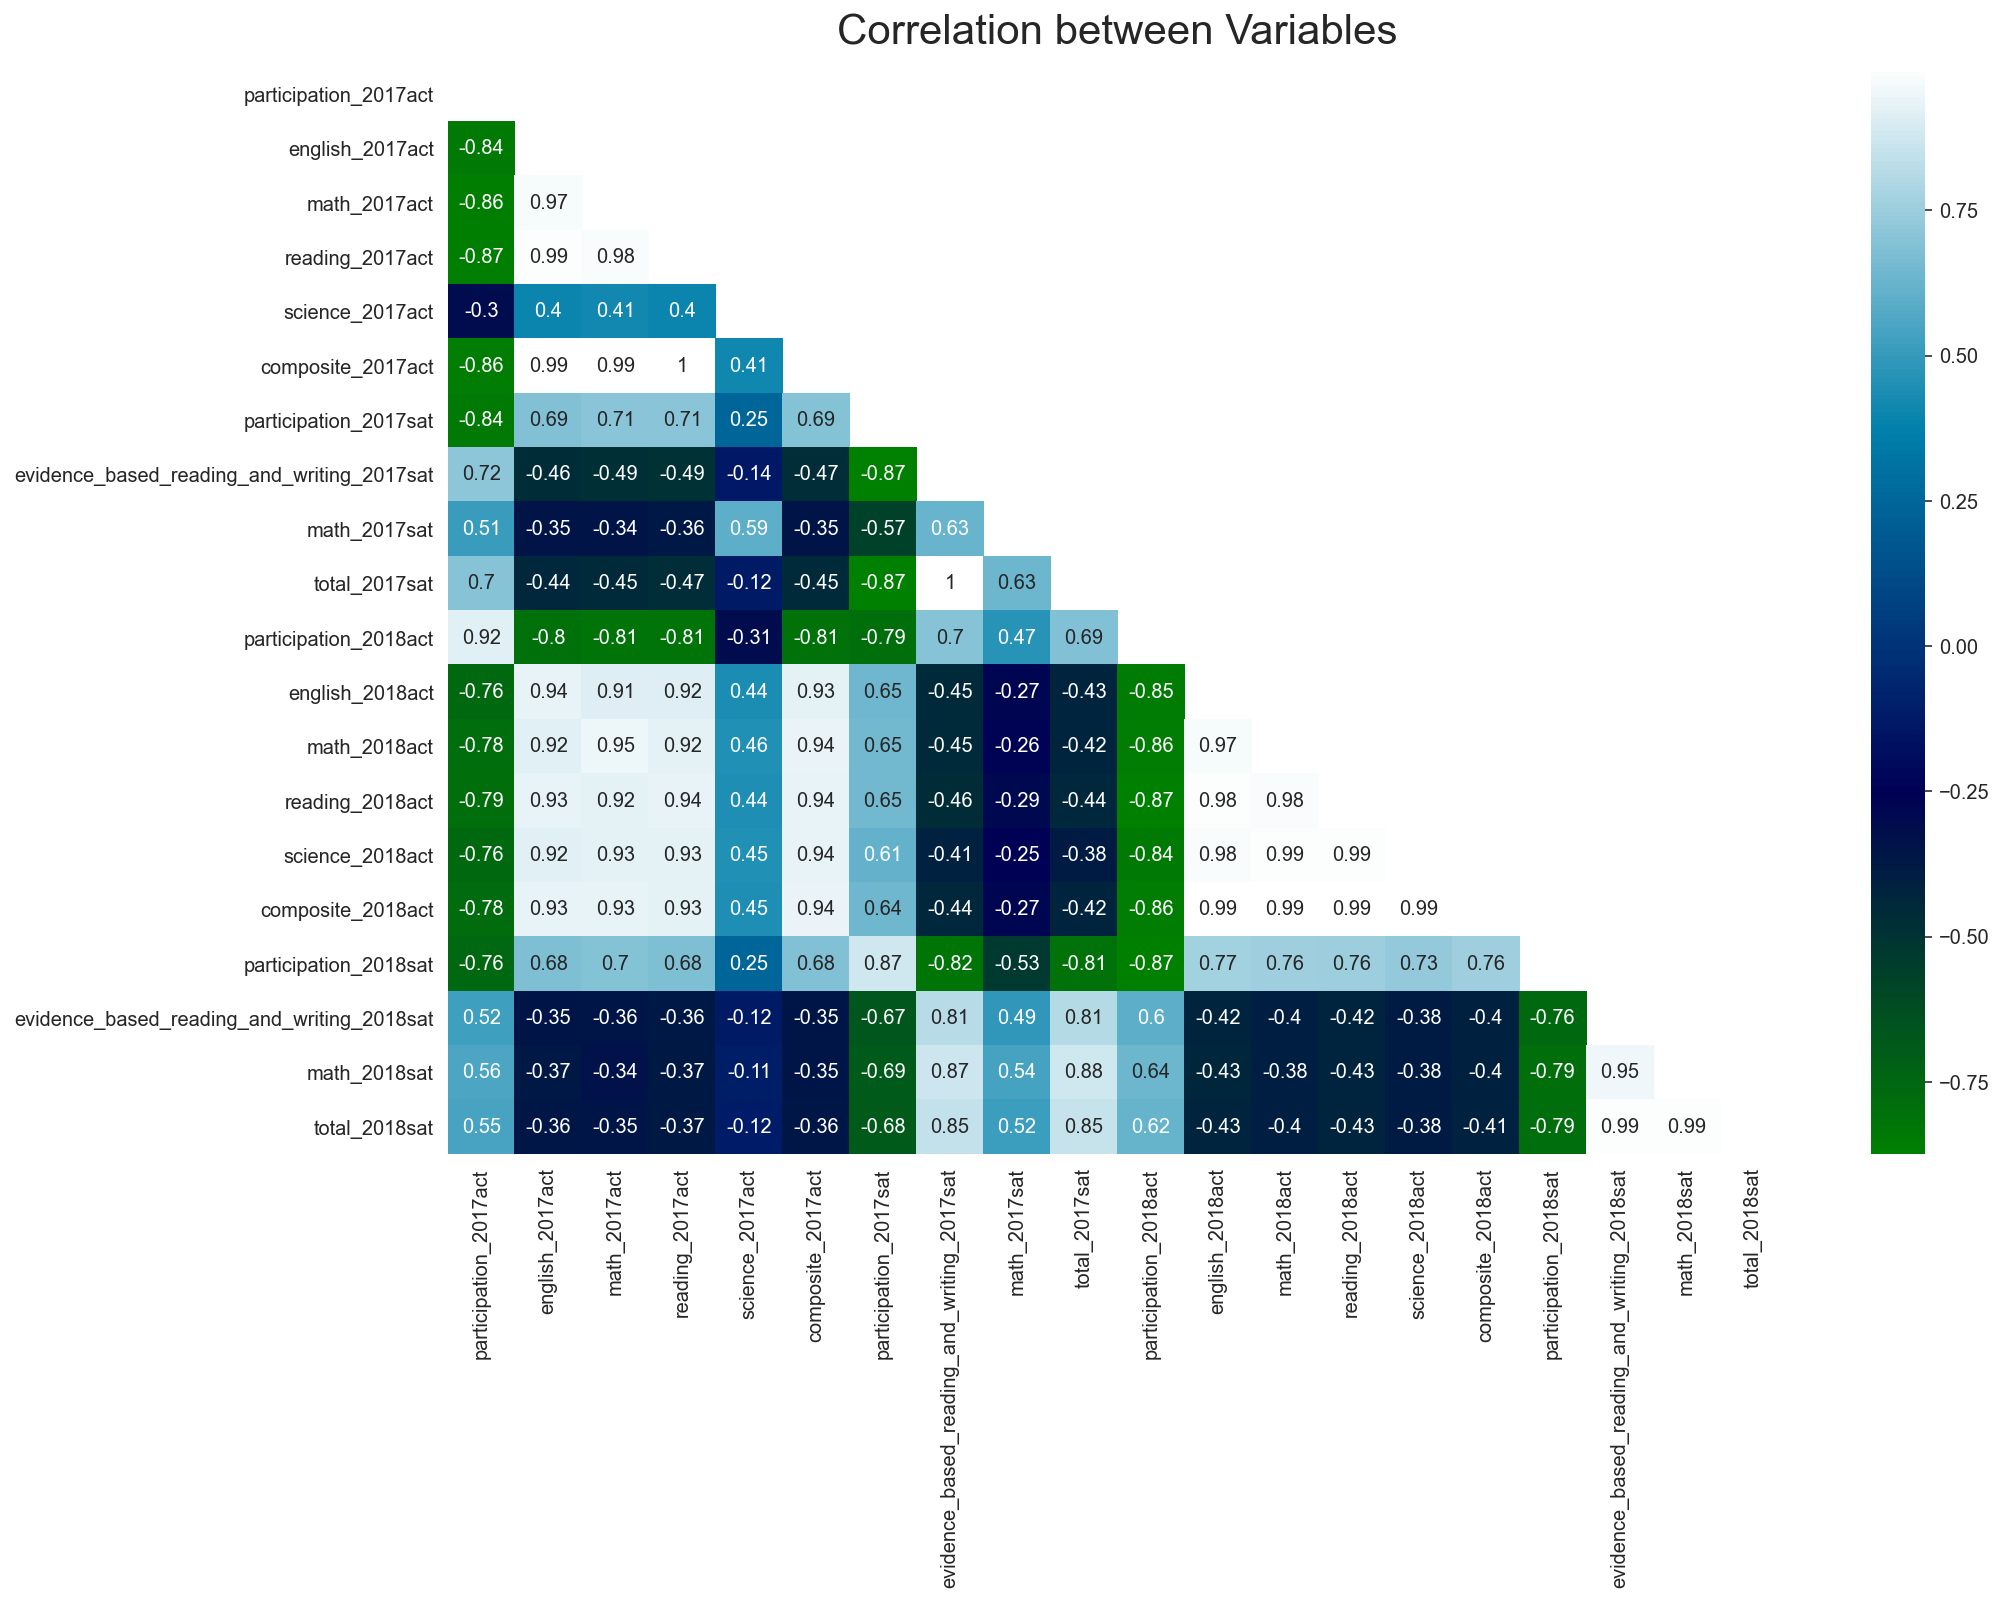

In [45]:
#masking the dataframe to not show duplicates 
mask = np.triu(final_df.corr())
#setting the figuresize of graph
plt.figure(figsize=(15,10))
#setting the title
plt.title('Correlation between Variables', fontsize=21, y=1.01)
#using seaborn heatmap to protray the correlation of the variables 
sns.heatmap(final_df.corr(),cmap="ocean",annot=True,mask=mask);

The figure above shows the correlation coefficient between the different variables in the dataframe. Let's zoom in to the variables in question in the next heatmap.

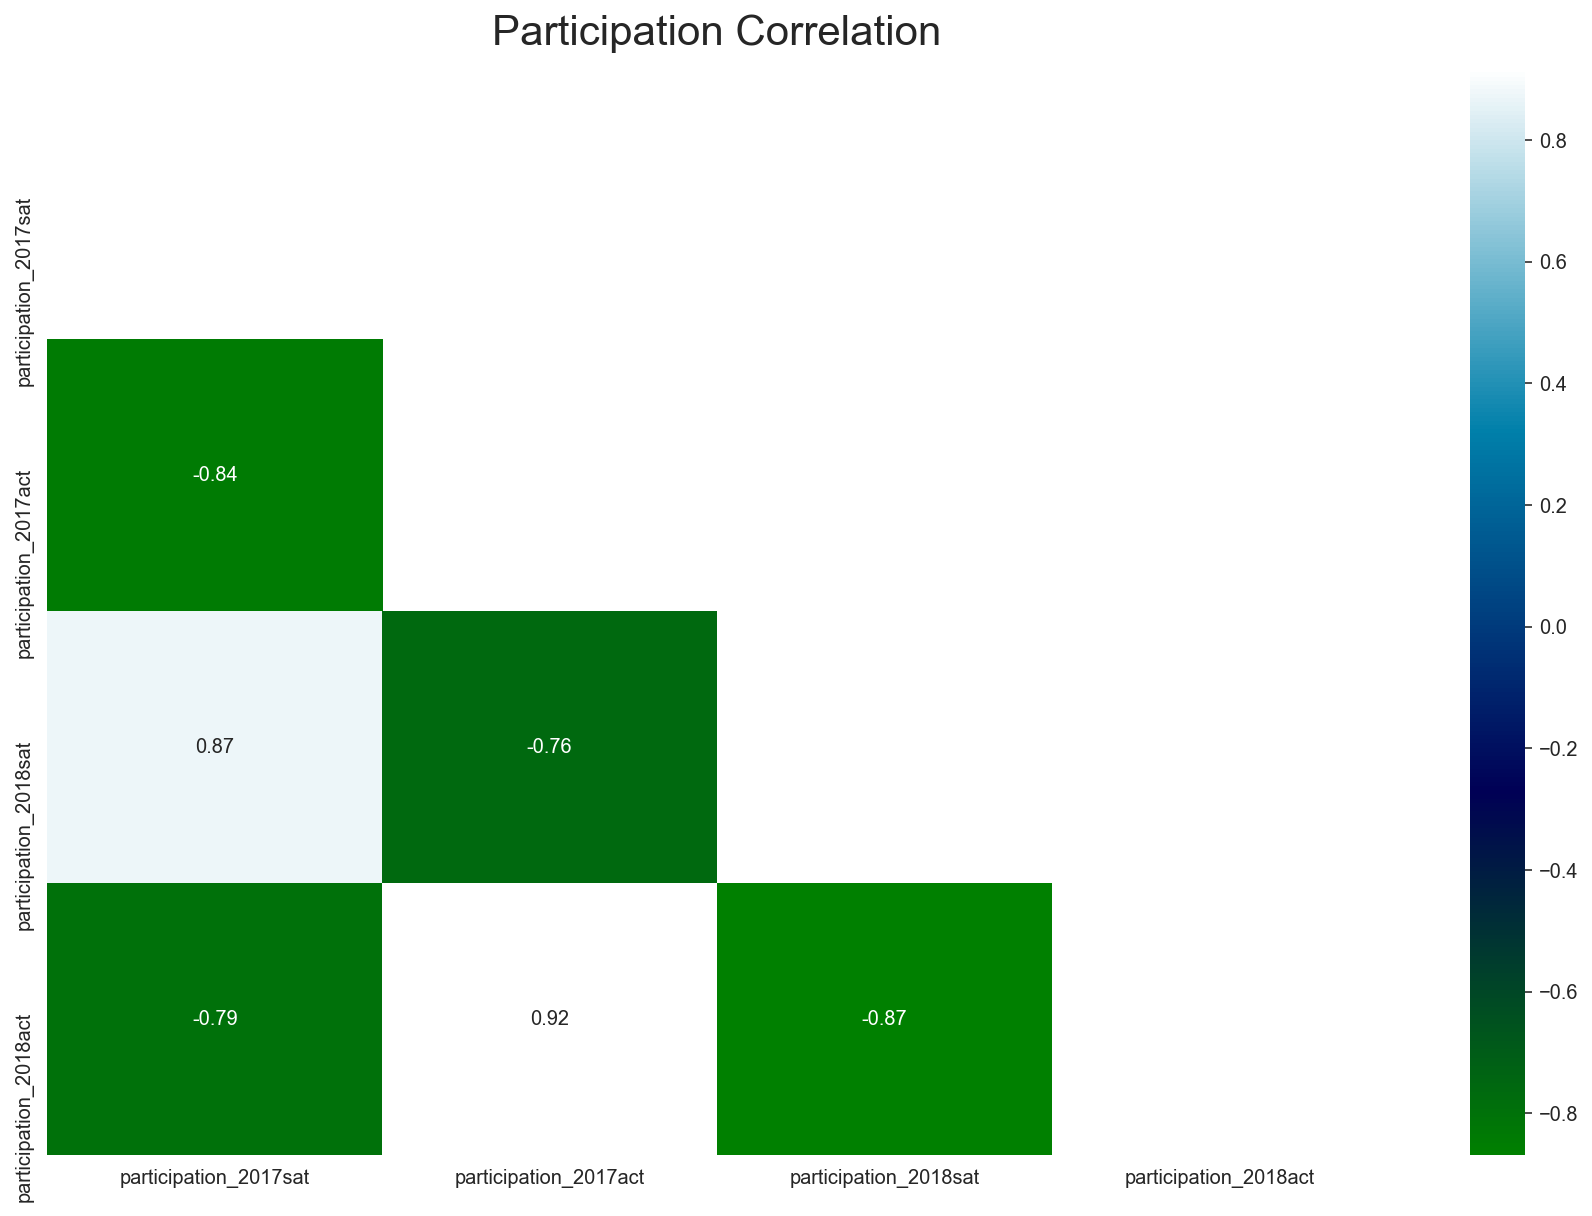

In [100]:
#defining a new dataframe with the desired variables
participation = final_df[['participation_2017sat','participation_2017act','participation_2018sat','participation_2018act']]
#masking the dataframe to not show duplicates 
mask = np.triu(participation.corr())
#setting the figuresize of graph
plt.figure(figsize=(15,10))
#setting the title
plt.title('Participation Correlation', fontsize=21, y=1.01)
#using seaborn heatmap to protray the correlation of the variables 
sns.heatmap(participation.corr(),cmap="ocean",annot=True,mask=mask);

The correlation I am interested here is between the participation of SAT and ACT in 2017 and 2018. The figure above shows the correlation between SAT 2017 participation and ACT 2017 participation at -0.84. The correlation between SAT 2018 participation and ACT 2018 participation at -0.87.

What these two numbers mean is that the participation of ACT is inversely correlated to the participation of SAT. In short, as the participation in ACT increases, the participation of SAT decreases and vice versa.

The strong correlation would mean that any external force that creates a change in participation for one exam will inversely affect the other exam.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [46]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(20,20)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    colors = ['tab:olive', 'tab:gray', 'tab:brown', 'tab:orange']
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],color=colors[i],bins=30) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].set_title(list_of_titles[i], fontsize=30)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=20)
        ax[i].axvline(dataframe[column].mean(),color='b')
        ax[i].axvline(dataframe[column].median(),color='r')

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

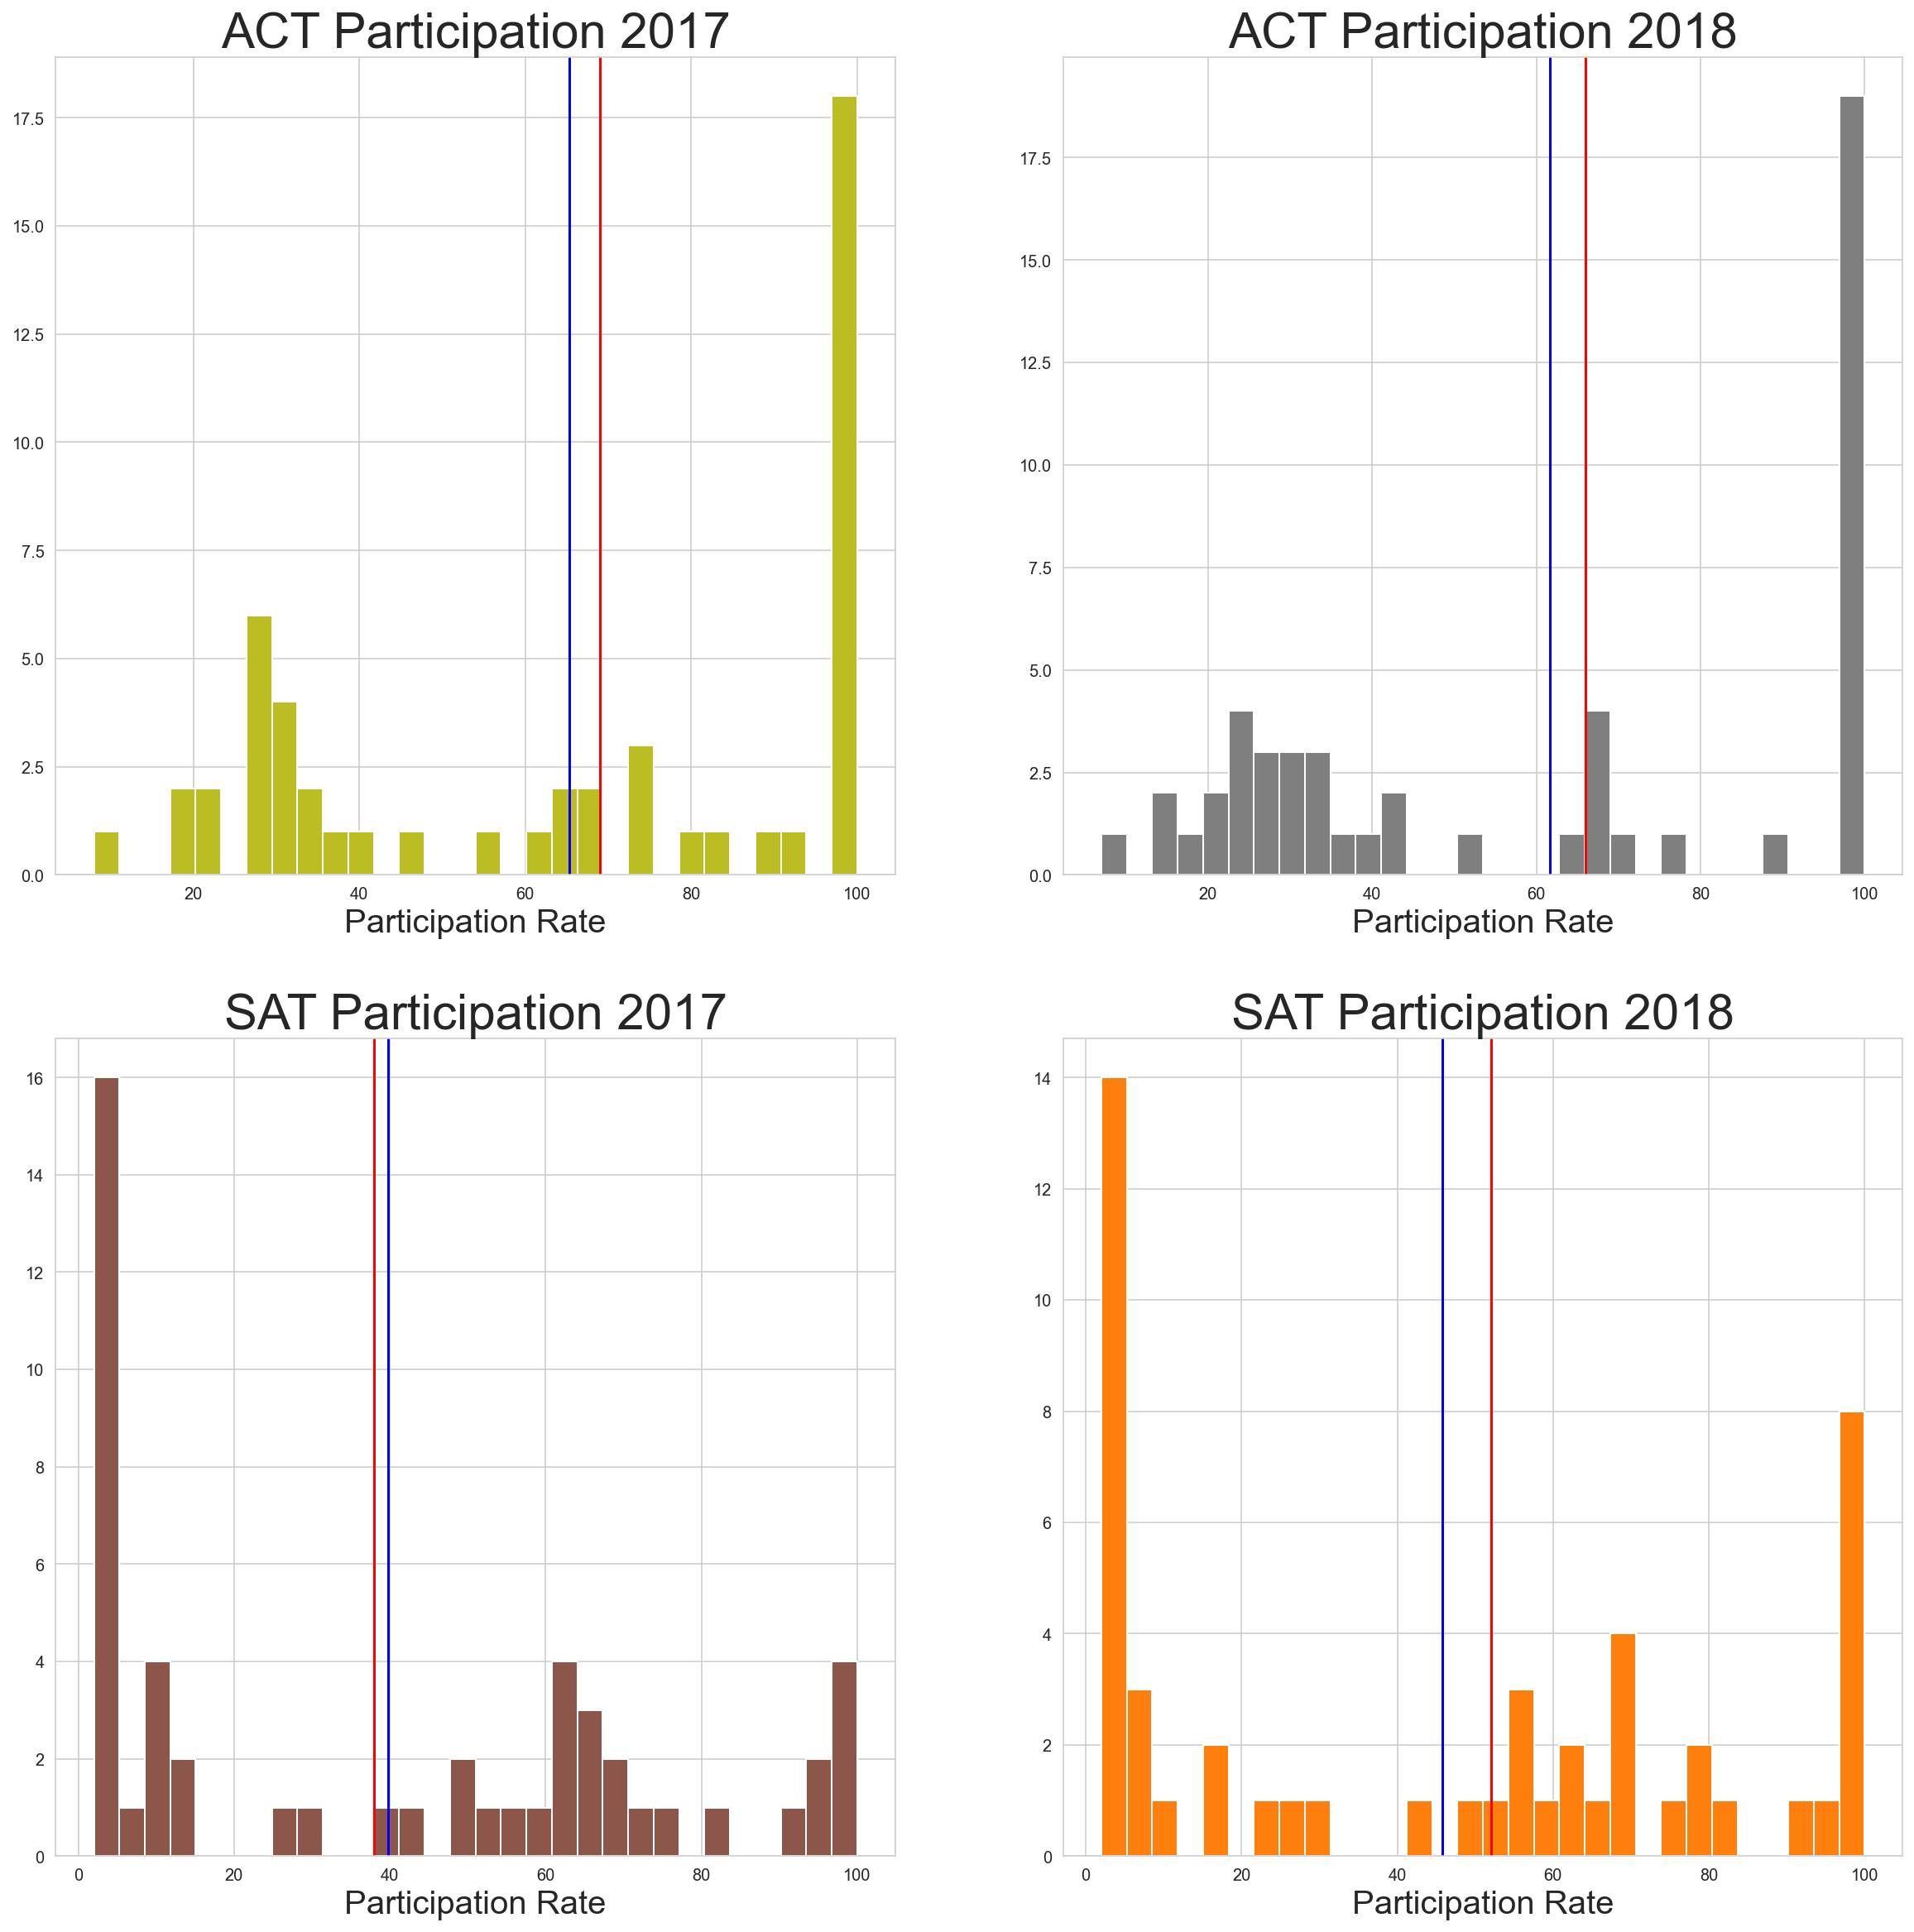

In [47]:
# Code
subplot_histograms(final_df,
                   ['participation_2017act','participation_2018act','participation_2017sat','participation_2018sat'],
                   ['ACT Participation 2017','ACT Participation 2018','SAT Participation 2017','SAT Participation 2018'],
                   ['Participation Rate','Participation Rate','Participation Rate','Participation Rate']);

The above figures shows the frequency of the average state participation. To read the figure, if there are 10 states with 100% participation rate, the bar at 100 will be at height 10 on the y-axis. This shows the spread of participation for the exam in state level. The blue line represents the mean participation rate amongst all states whereas the red line represents the median(50th percentile) participation rate. 

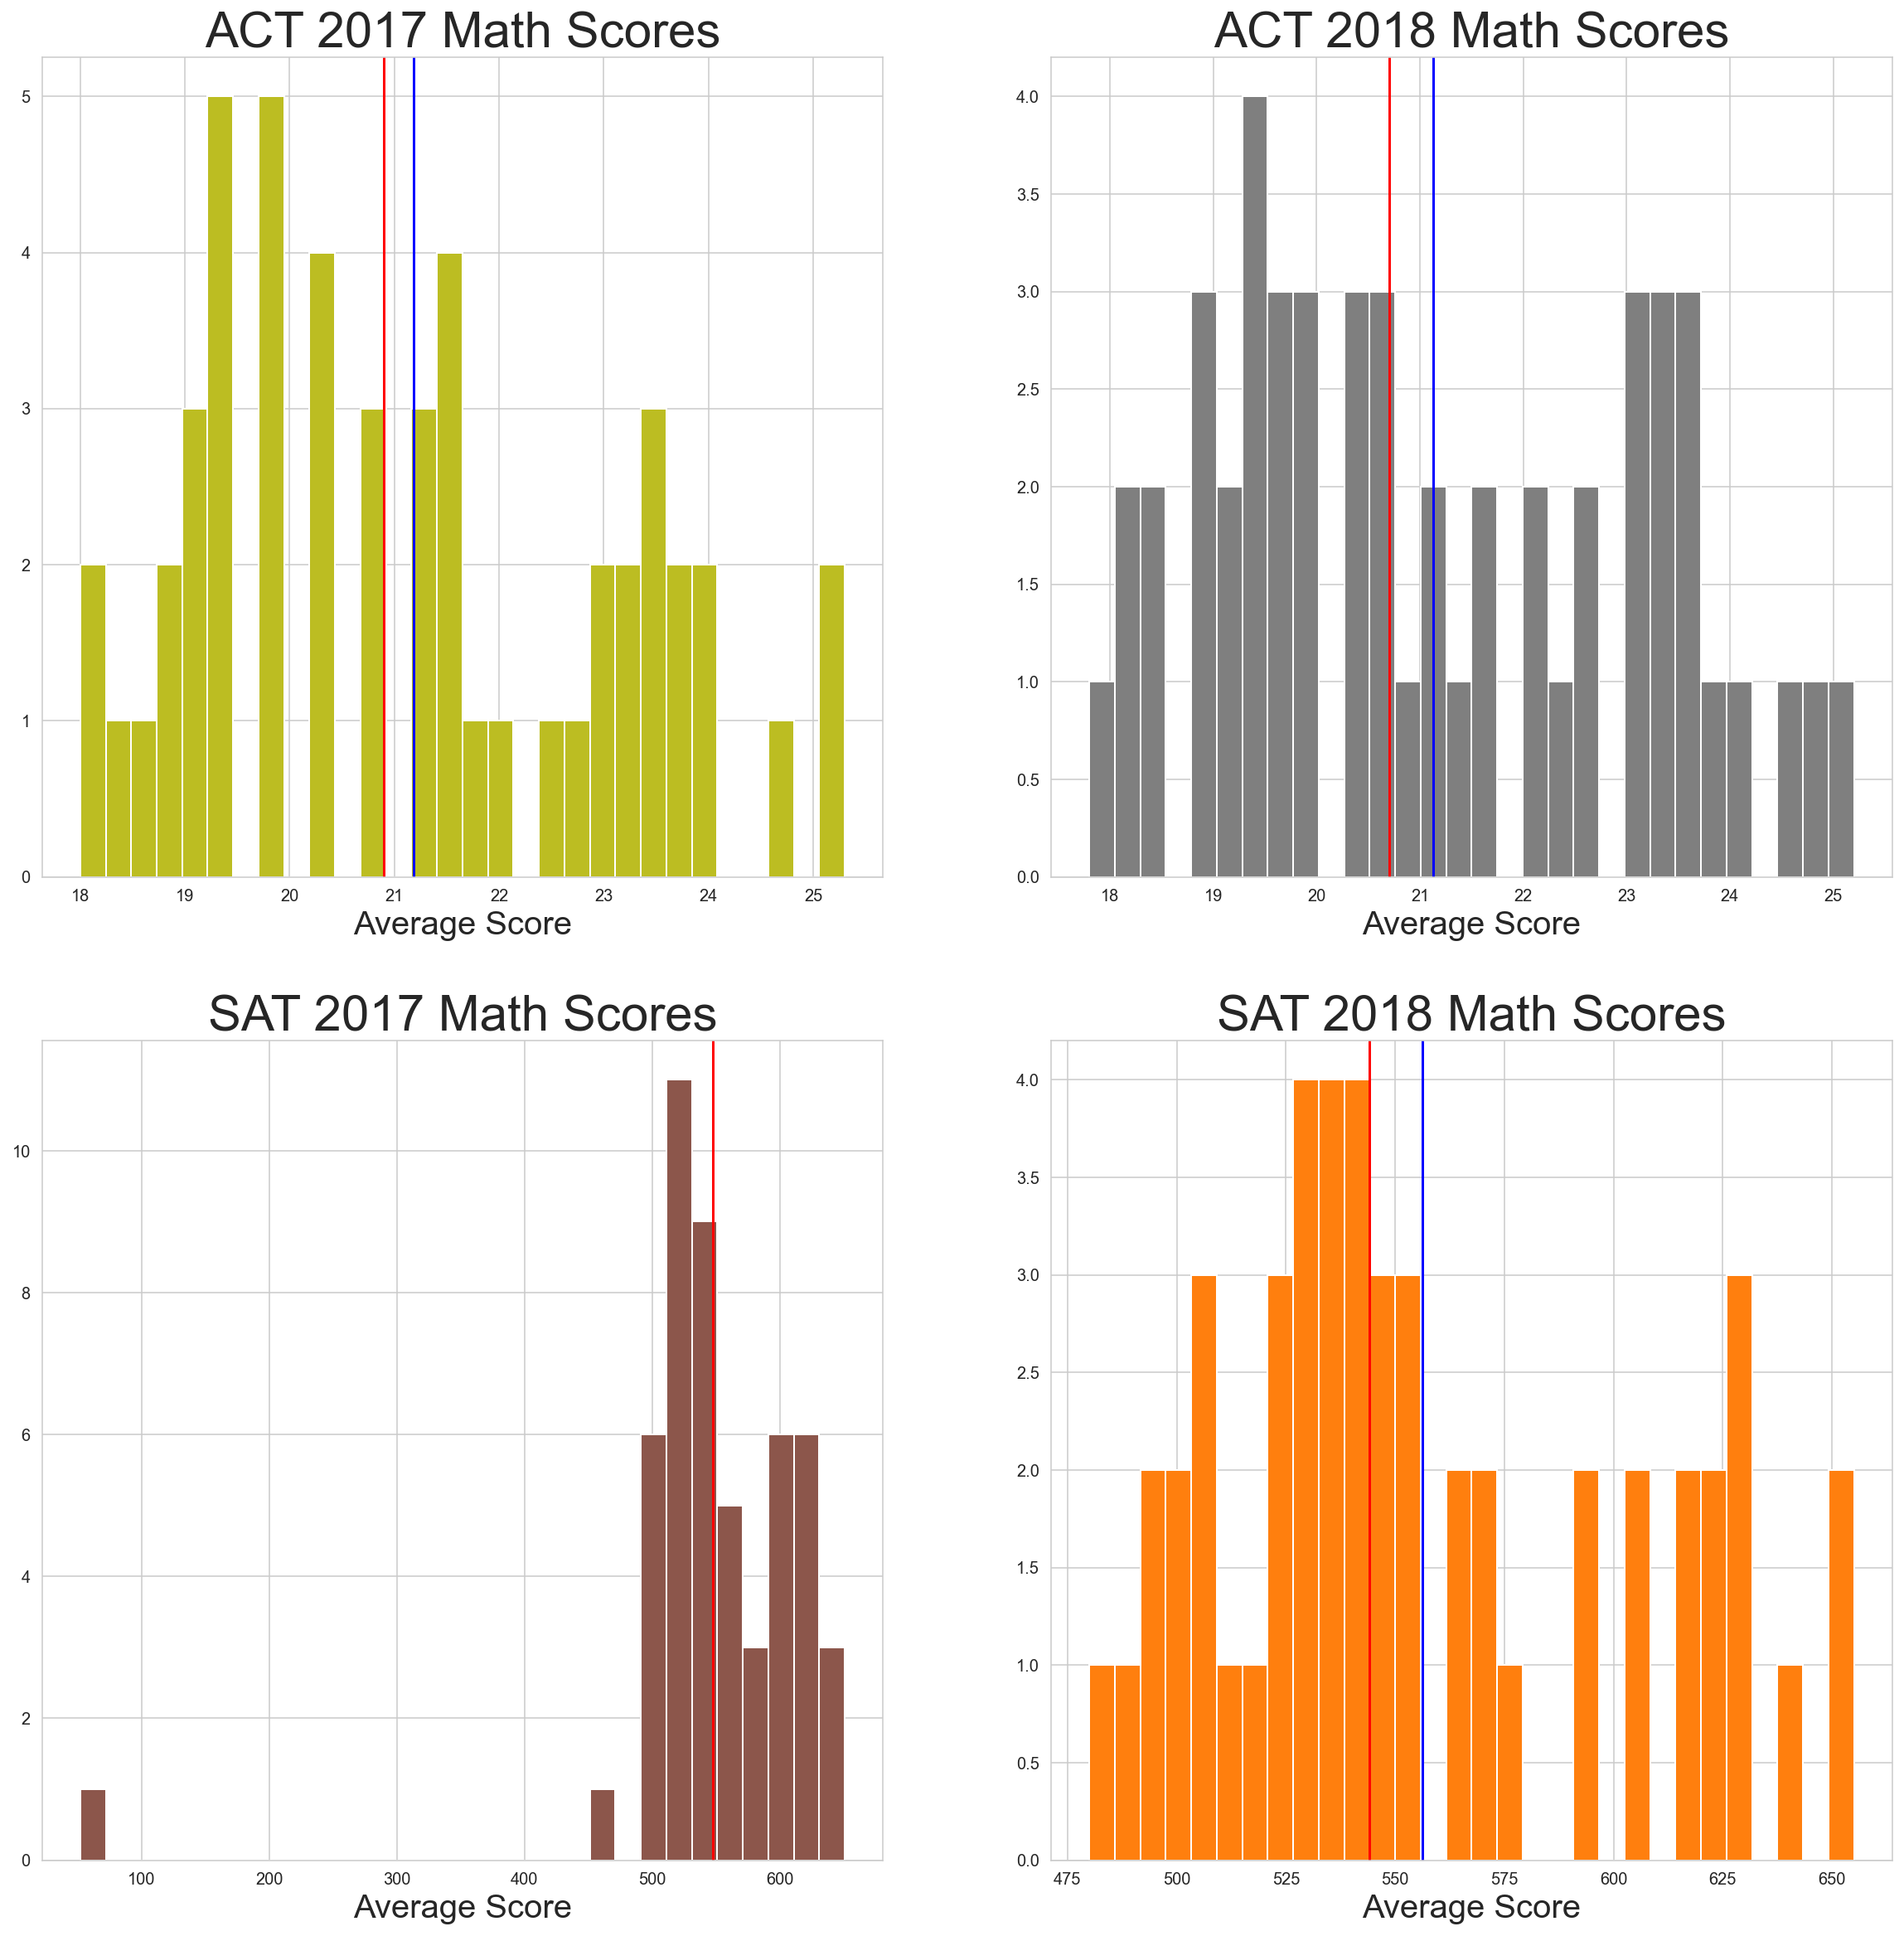

In [48]:
subplot_histograms(final_df,
                   ['math_2017act','math_2018act','math_2017sat','math_2018sat'],
                   ['ACT 2017 Math Scores','ACT 2018 Math Scores','SAT 2017 Math Scores','SAT 2018 Math Scores'],
                   ['Average Score','Average Score','Average Score','Average Score']);

Similarly for the above figure, shows the frequency of the math score being of a value in the x-axis. This shows the spread of math exam scores in state level. The blue line represents the mean score amongst all states whereas the red line represents the median(50th percentile) score.

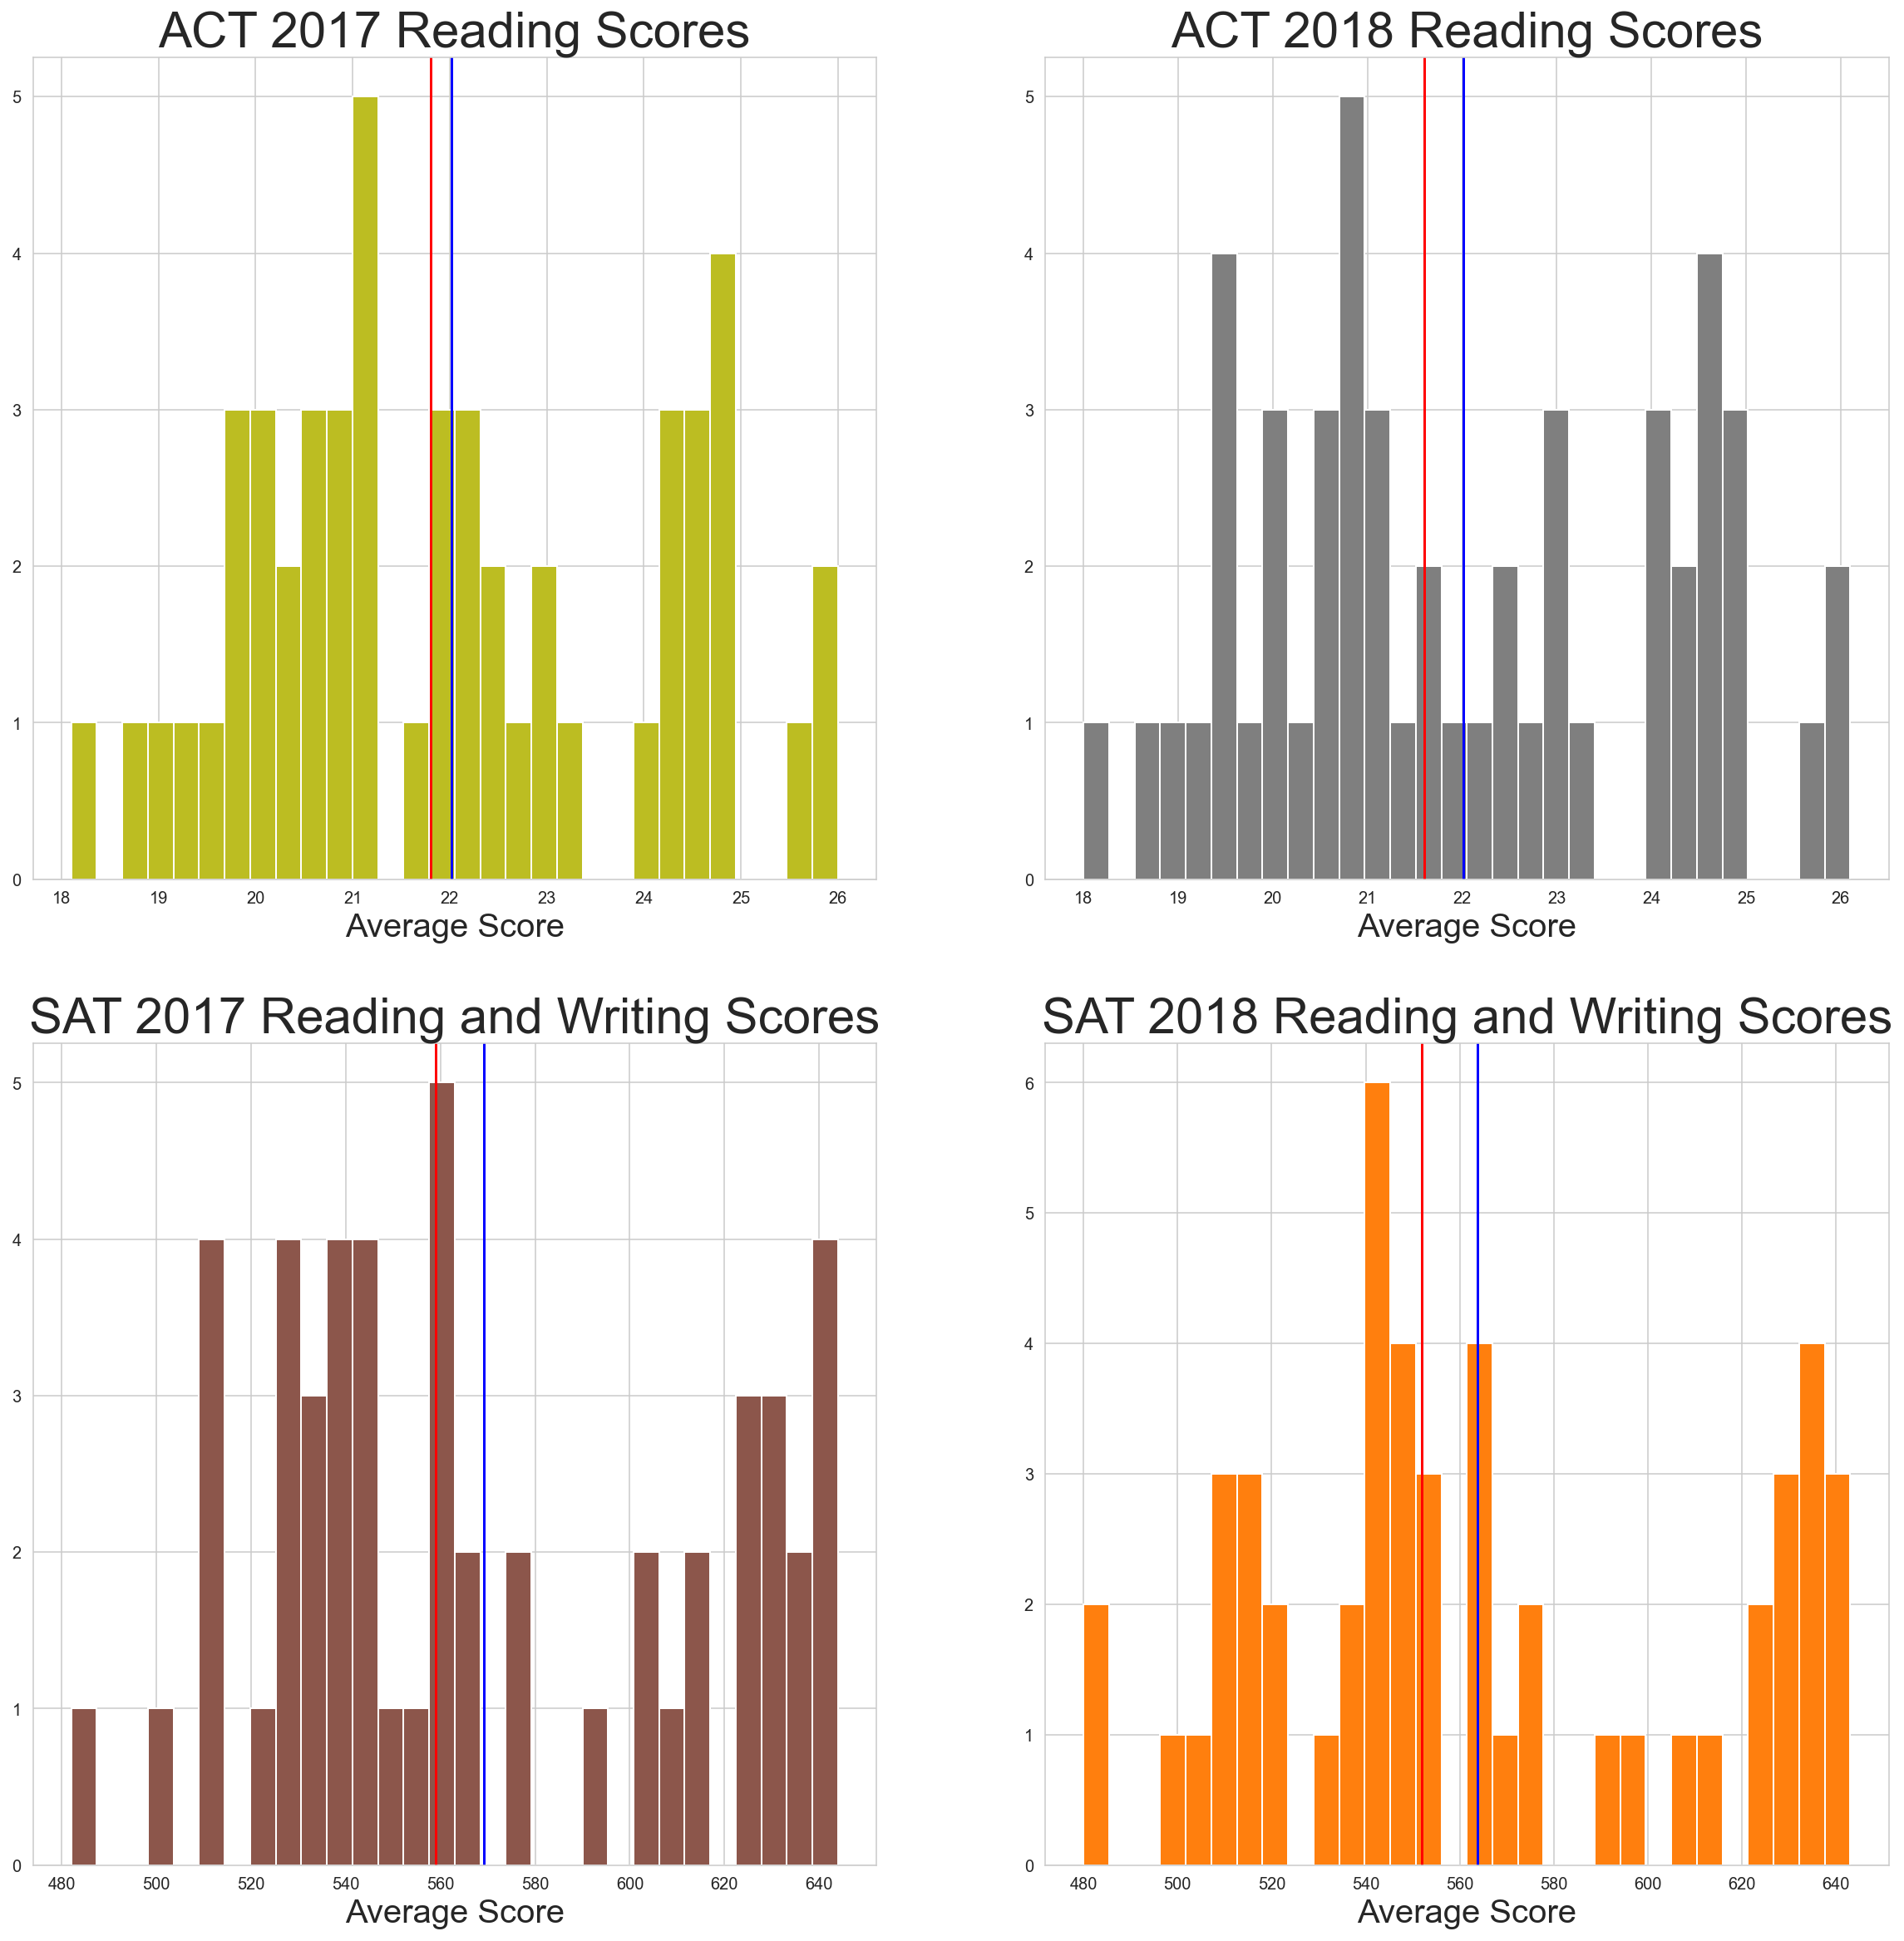

In [49]:
subplot_histograms(final_df,
                   ['reading_2017act','reading_2018act','evidence_based_reading_and_writing_2017sat','evidence_based_reading_and_writing_2018sat'],
                   ['ACT 2017 Reading Scores','ACT 2018 Reading Scores','SAT 2017 Reading and Writing Scores','SAT 2018 Reading and Writing Scores'],
                   ['Average Score','Average Score','Average Score','Average Score']);

Finally, the figure above shows the frequency of the reading score being of a value in the x-axis. This shows the spread of reading exam scores in state level. The blue line represents the mean score amongst all states whereas the red line represents the median(50th percentile) score.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [50]:
def subplot_scatter(dataframe, list_of_x, list_of_y, list_of_titles):
    nrows = int(np.ceil(len(list_of_x)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(20,20))
    ax = ax.ravel()
    colors = ['tab:olive', 'tab:gray', 'tab:brown', 'tab:orange', 'tab:pink']
    for i, column in enumerate(list_of_x):
        ax[i].scatter(x=dataframe[list_of_x[i]],y=dataframe[list_of_y[i]],color=colors[i])
        ax[i].set_title(list_of_titles[i], fontsize=20,fontweight="bold")
        ax[i].set_xlabel(list_of_x[i], fontsize=15)
        ax[i].set_ylabel(list_of_y[i], fontsize=15)
    ax.flat[-1].set_visible(False)
    plt.show();

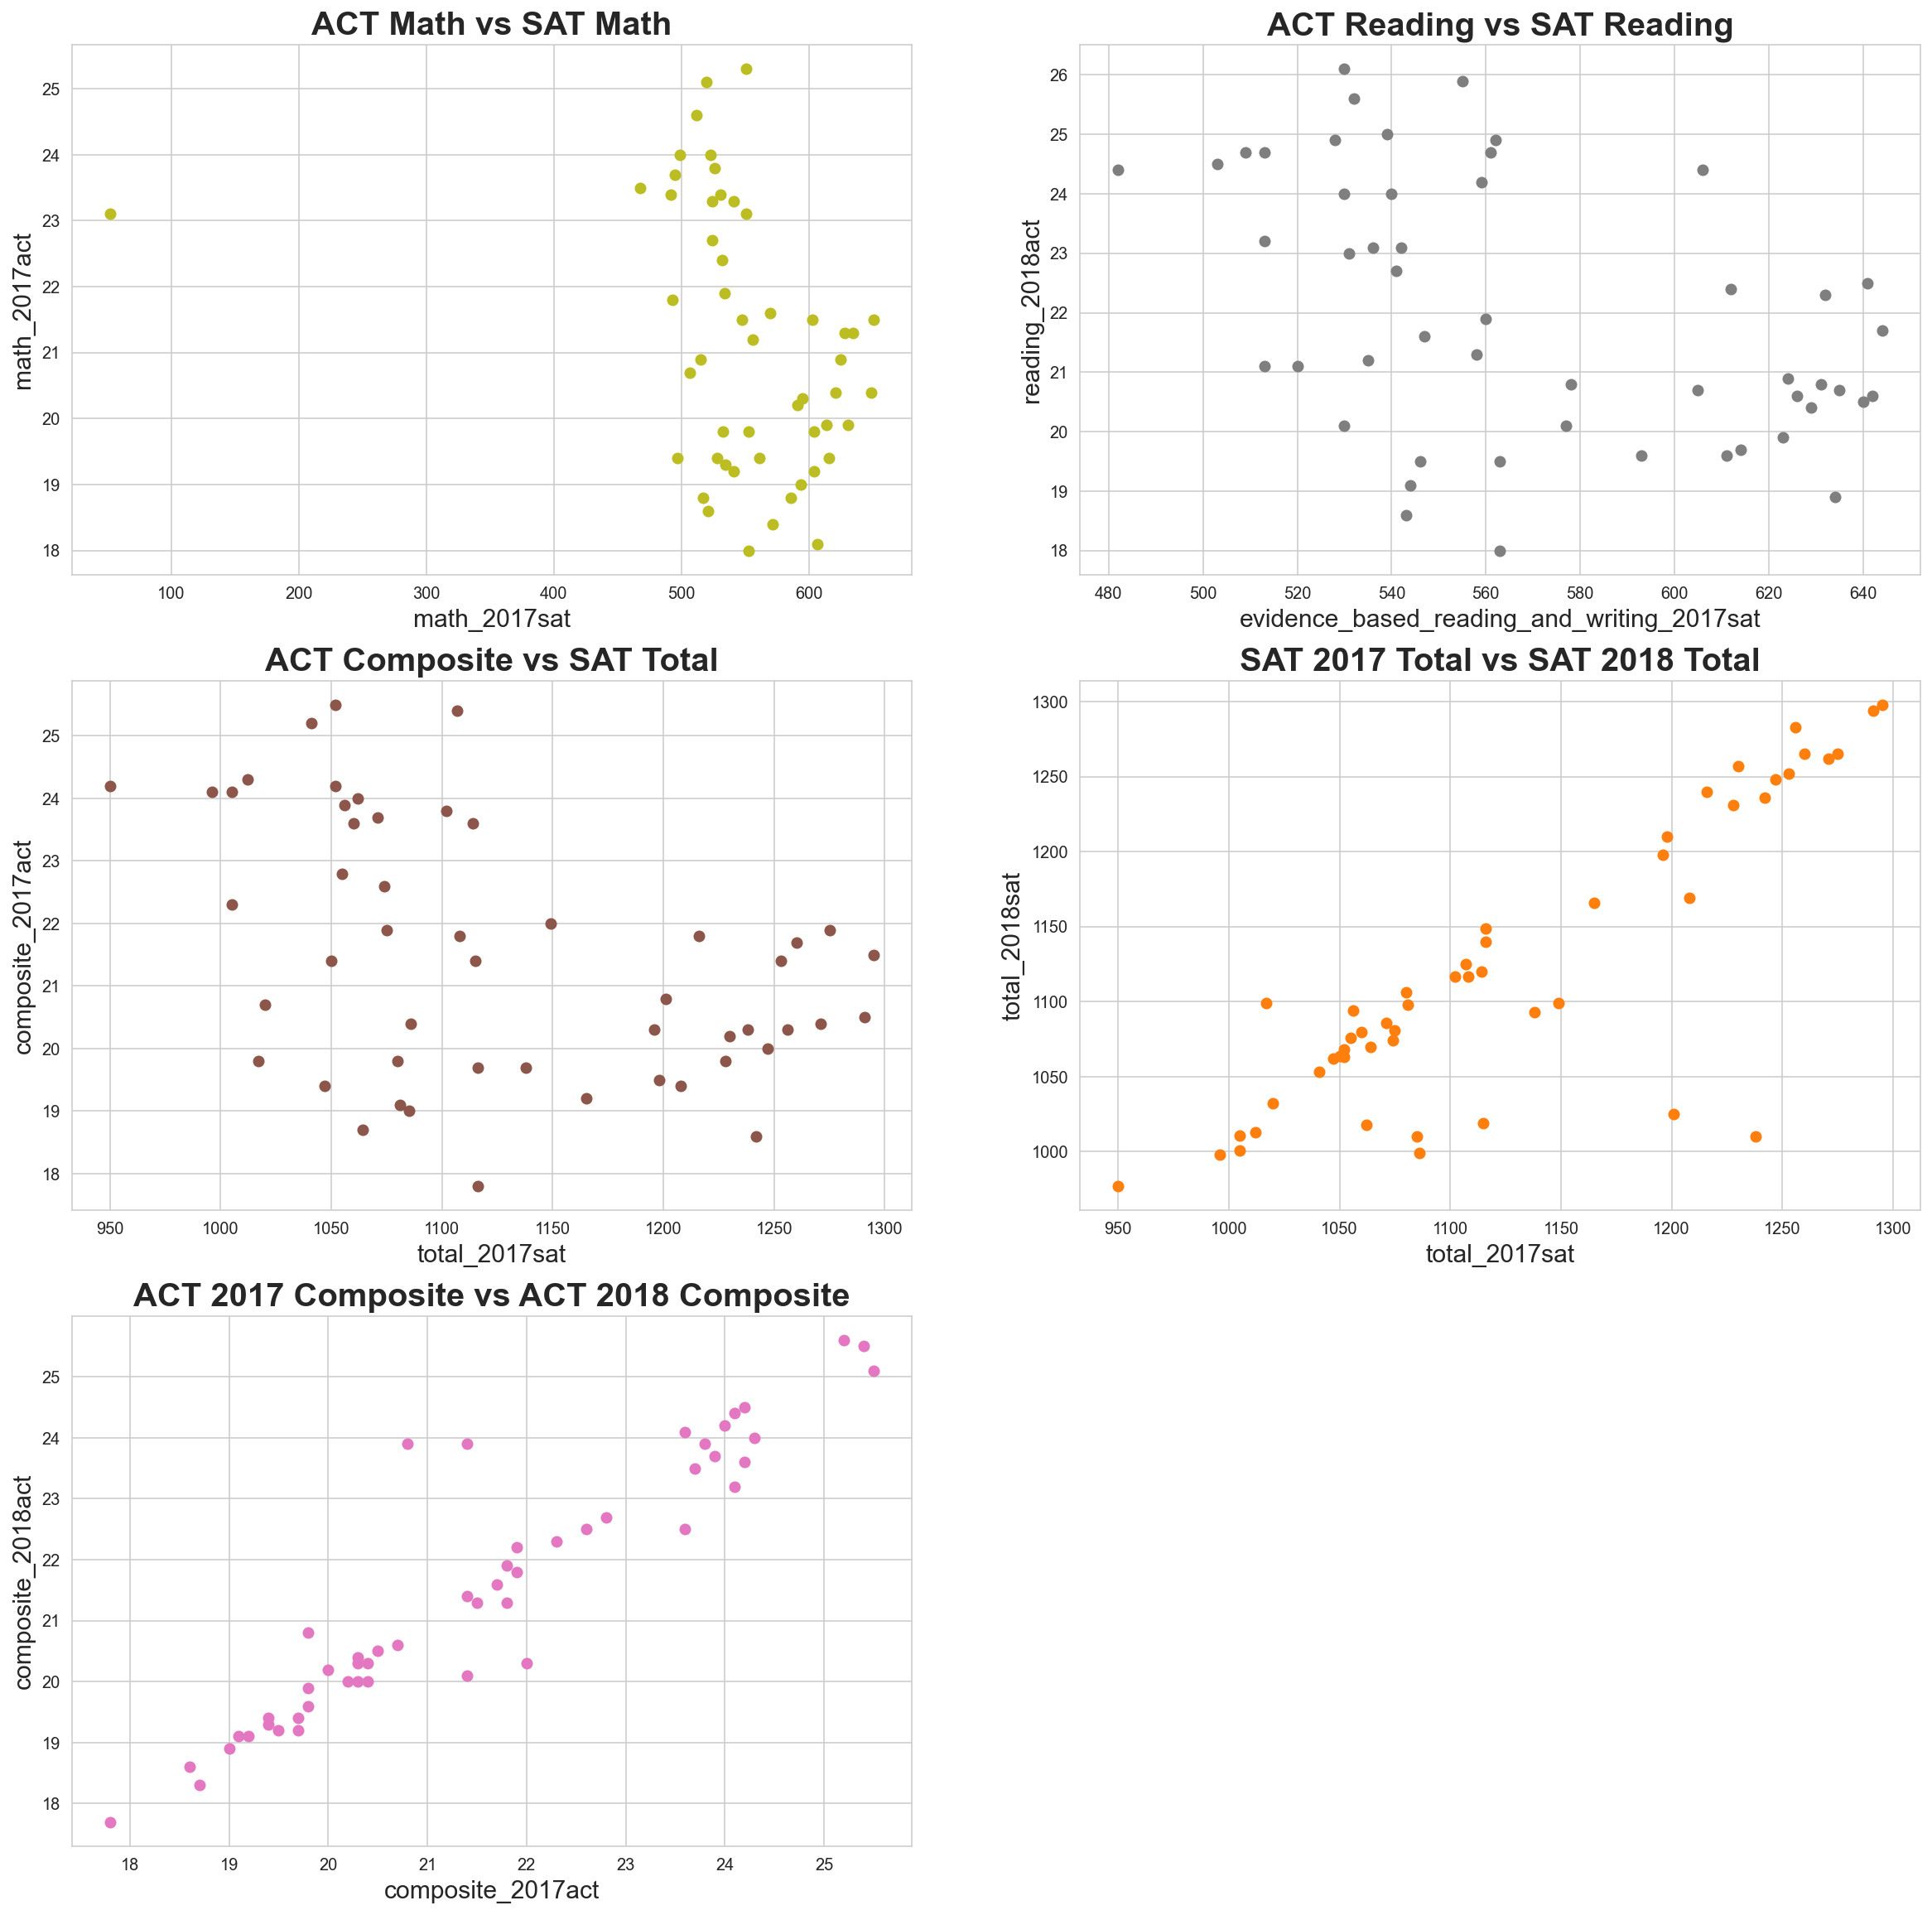

In [51]:
subplot_scatter(final_df,
                ['math_2017sat','evidence_based_reading_and_writing_2017sat','total_2017sat','total_2017sat','composite_2017act'],
                ['math_2017act','reading_2018act','composite_2017act','total_2018sat','composite_2018act'],
                ['ACT Math vs SAT Math','ACT Reading vs SAT Reading','ACT Composite vs SAT Total','SAT 2017 Total vs SAT 2018 Total','ACT 2017 Composite vs ACT 2018 Composite']);

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

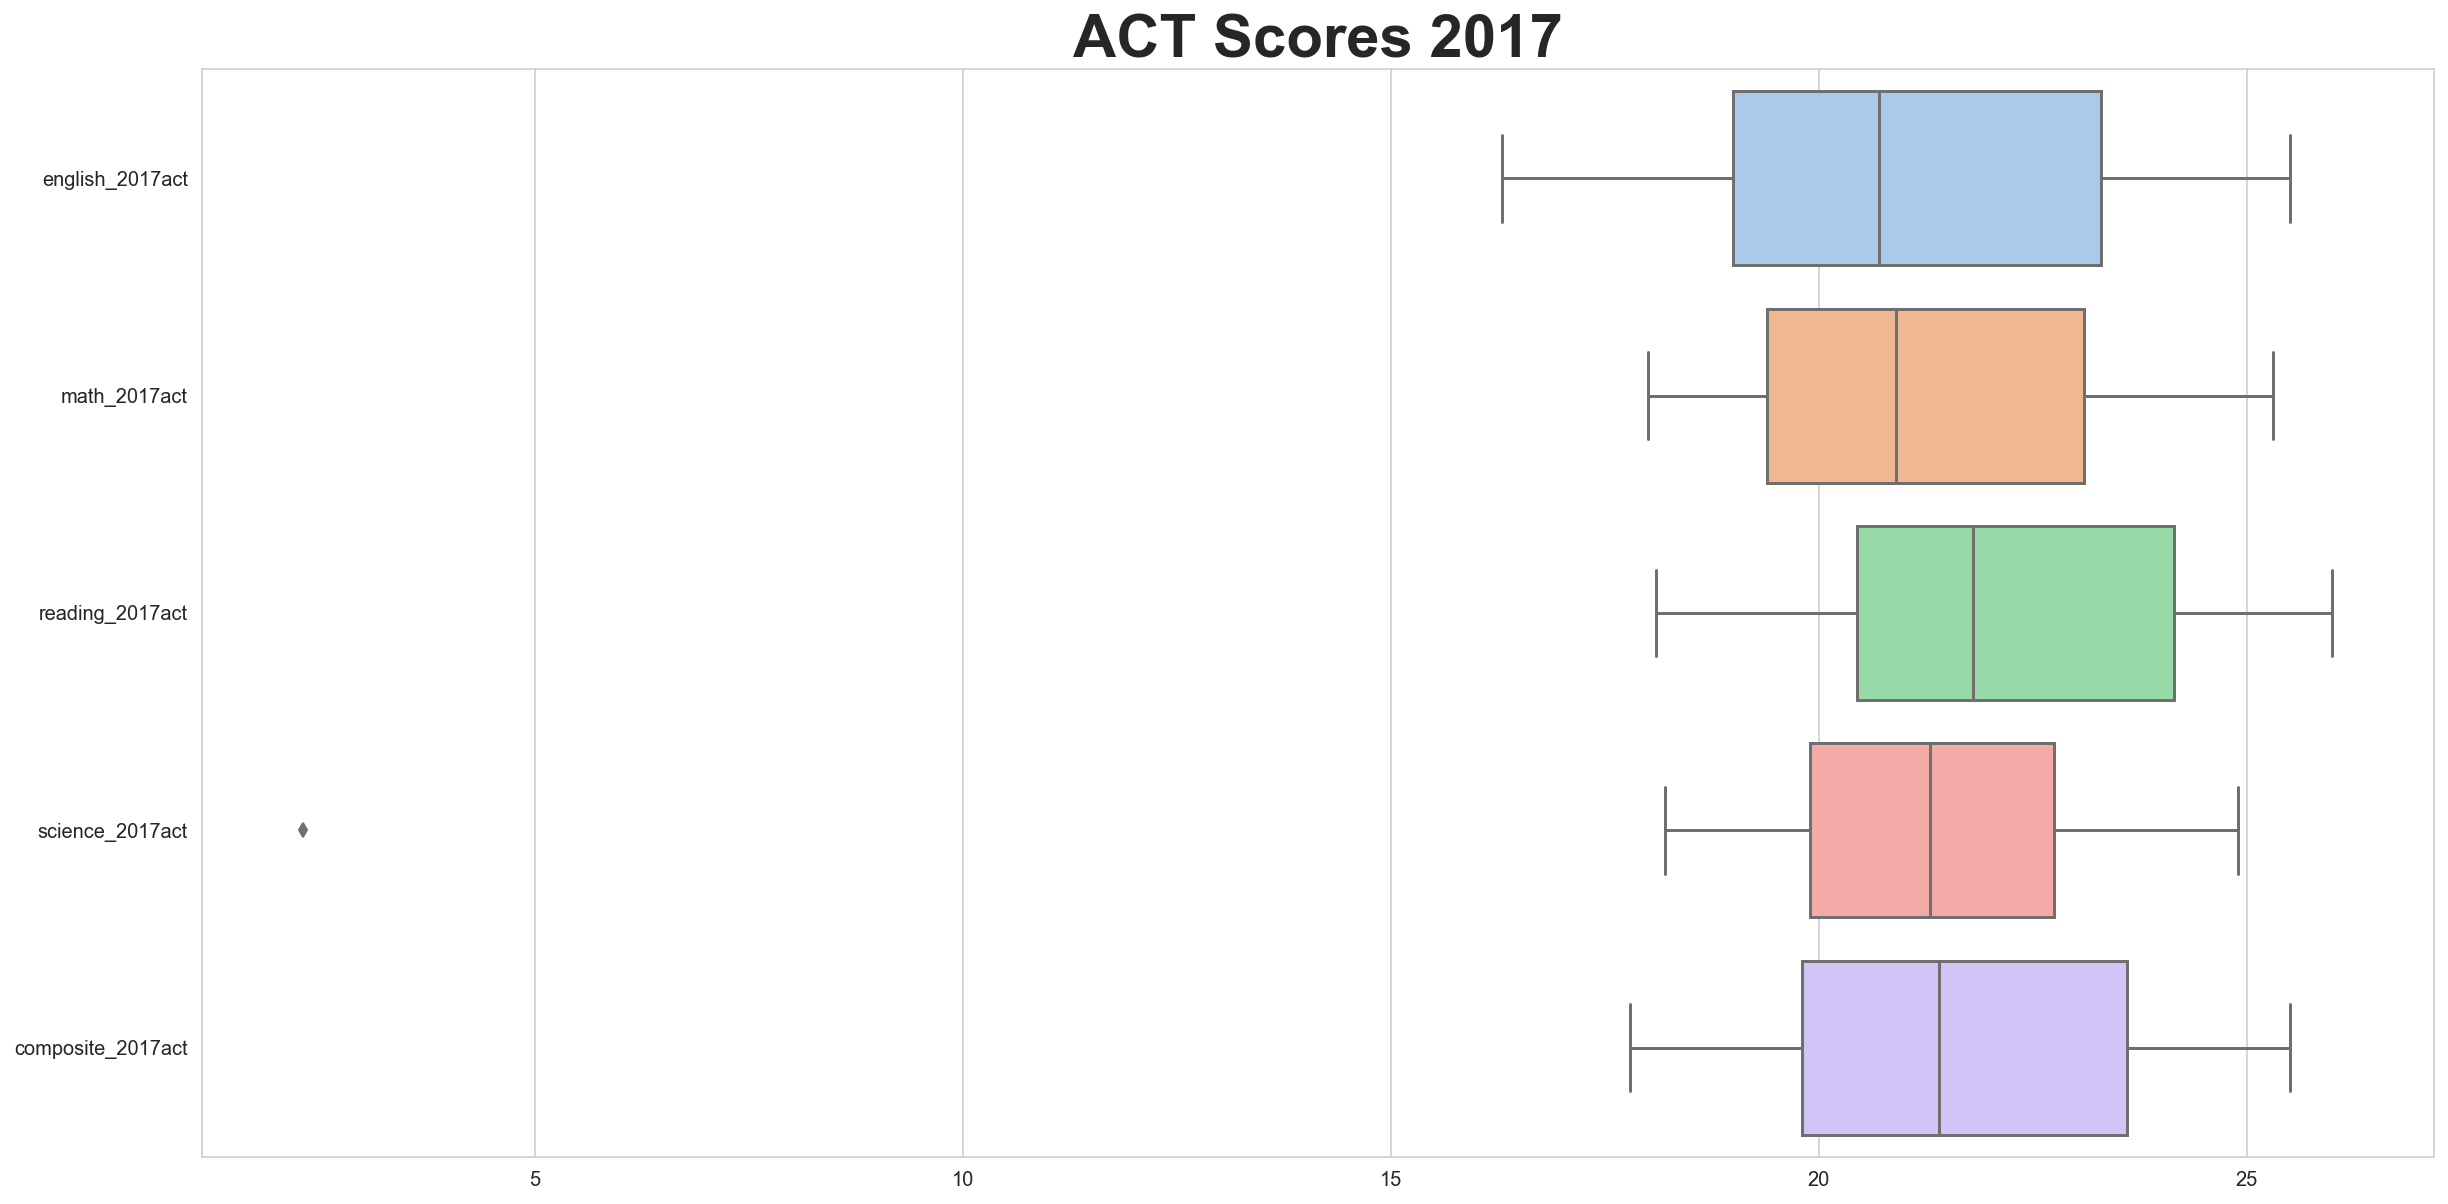

In [52]:
# Code
plt.figure(figsize=(20,10))
plt.title("ACT Scores 2017",fontweight="bold",fontsize=30)
sns.boxplot(data=final_df[['english_2017act','math_2017act','reading_2017act','science_2017act','composite_2017act']],orient='h',palette='pastel');

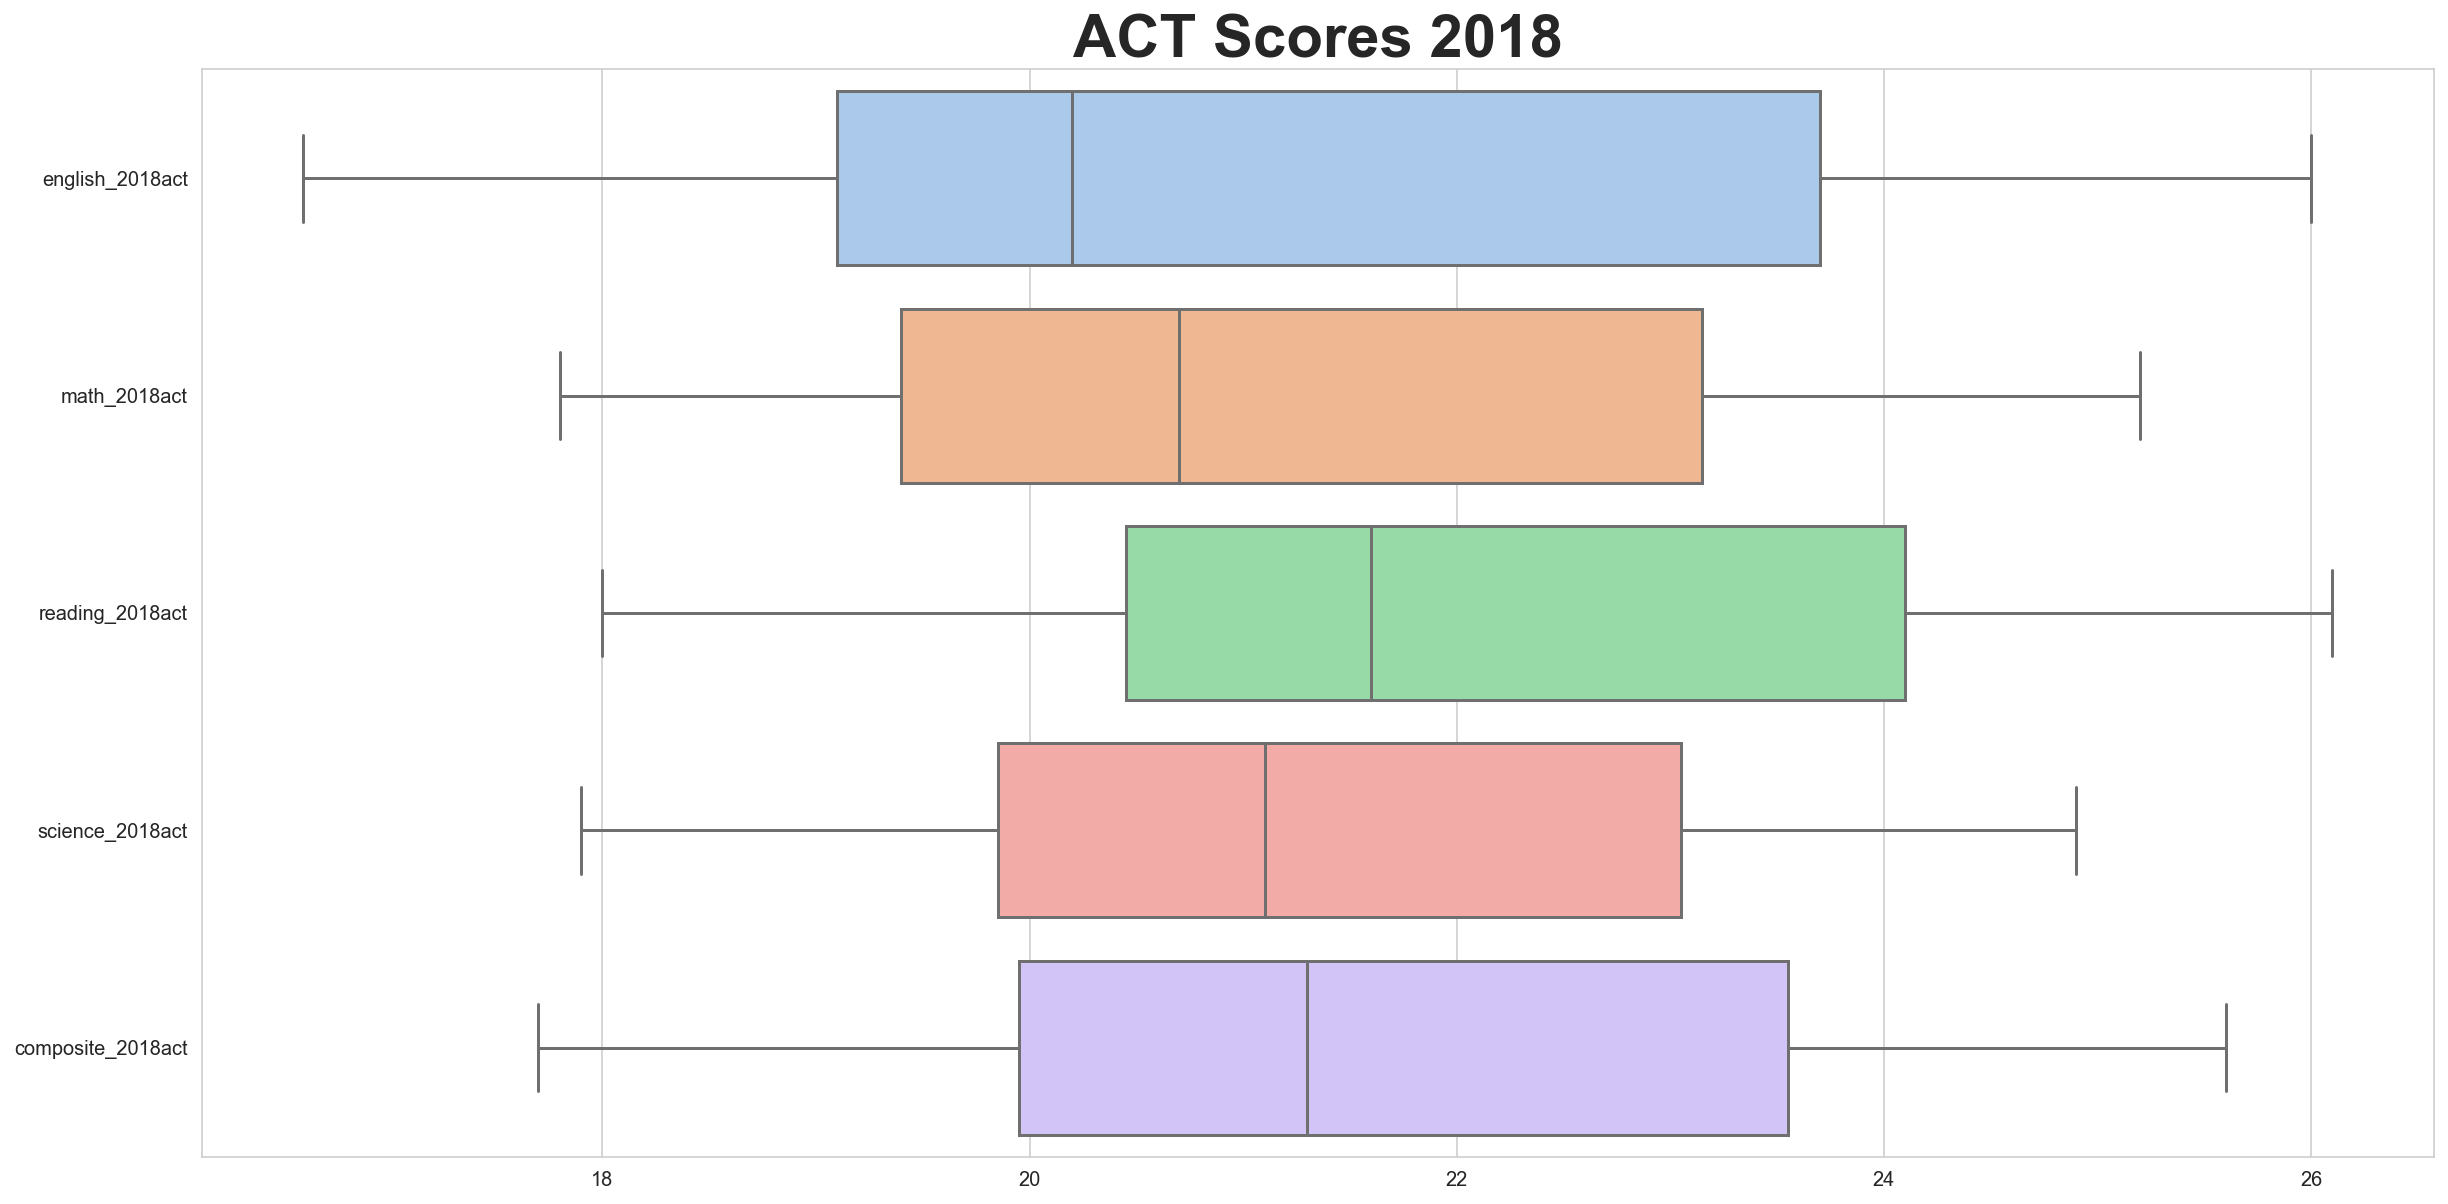

In [53]:
plt.figure(figsize=(20,10))
plt.title("ACT Scores 2018",fontweight="bold",fontsize=30)
sns.boxplot(data=final_df[['english_2018act','math_2018act','reading_2018act','science_2018act','composite_2018act']],orient='h',palette='pastel');

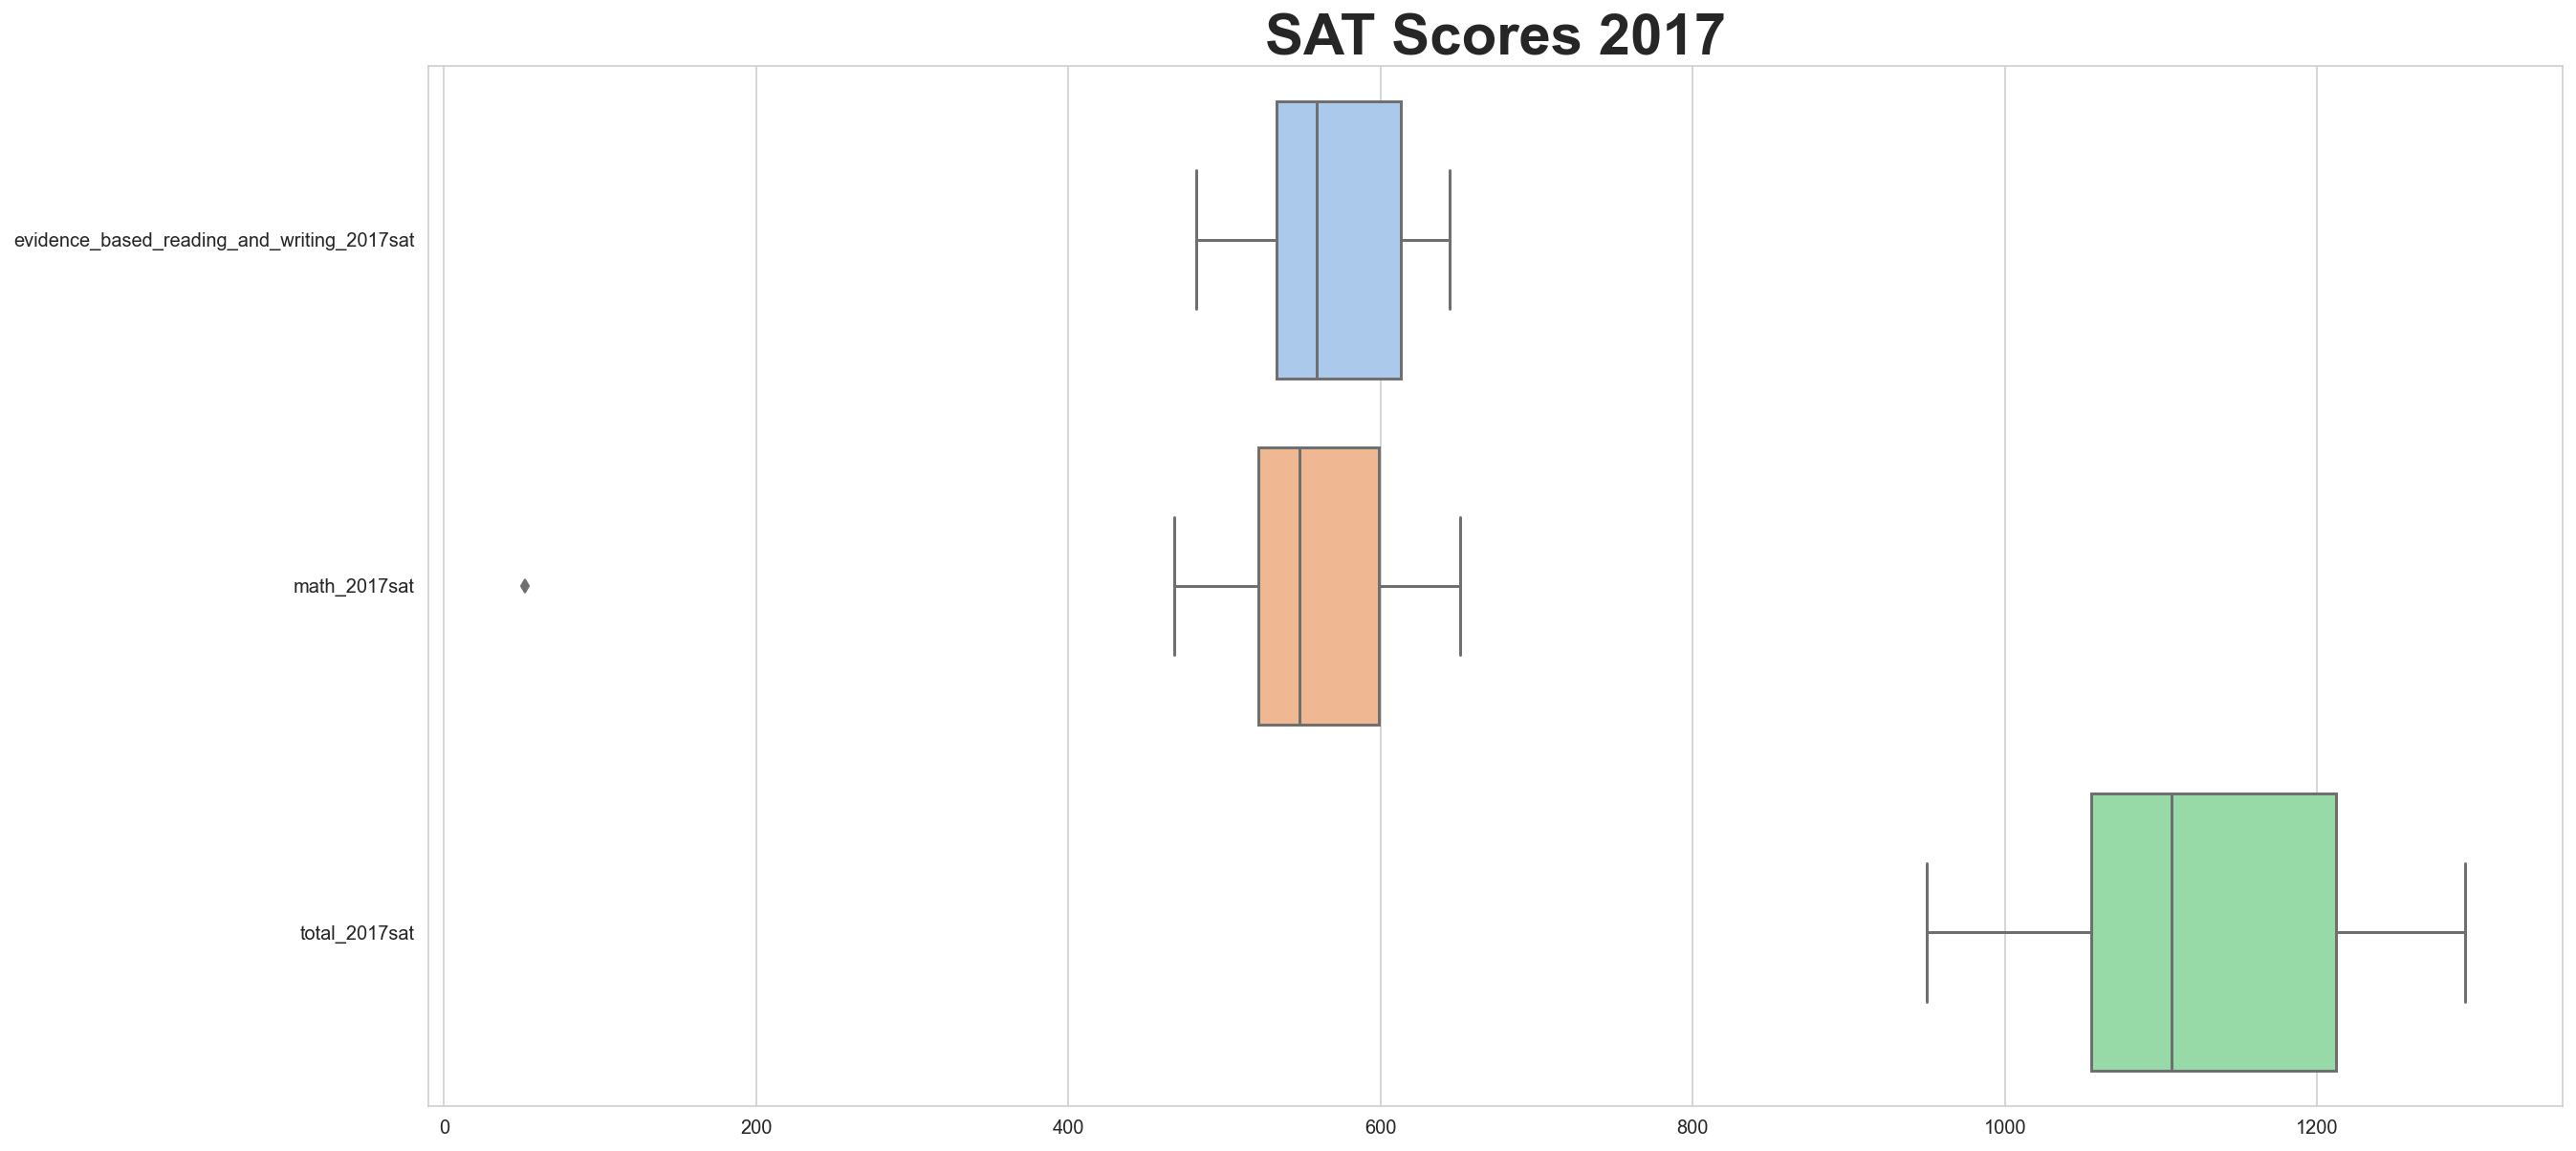

In [54]:
plt.figure(figsize=(20,10))
plt.title("SAT Scores 2017",fontweight="bold",fontsize=30)
sns.boxplot(data=final_df[['evidence_based_reading_and_writing_2017sat','math_2017sat','total_2017sat']],orient='h',palette='pastel');

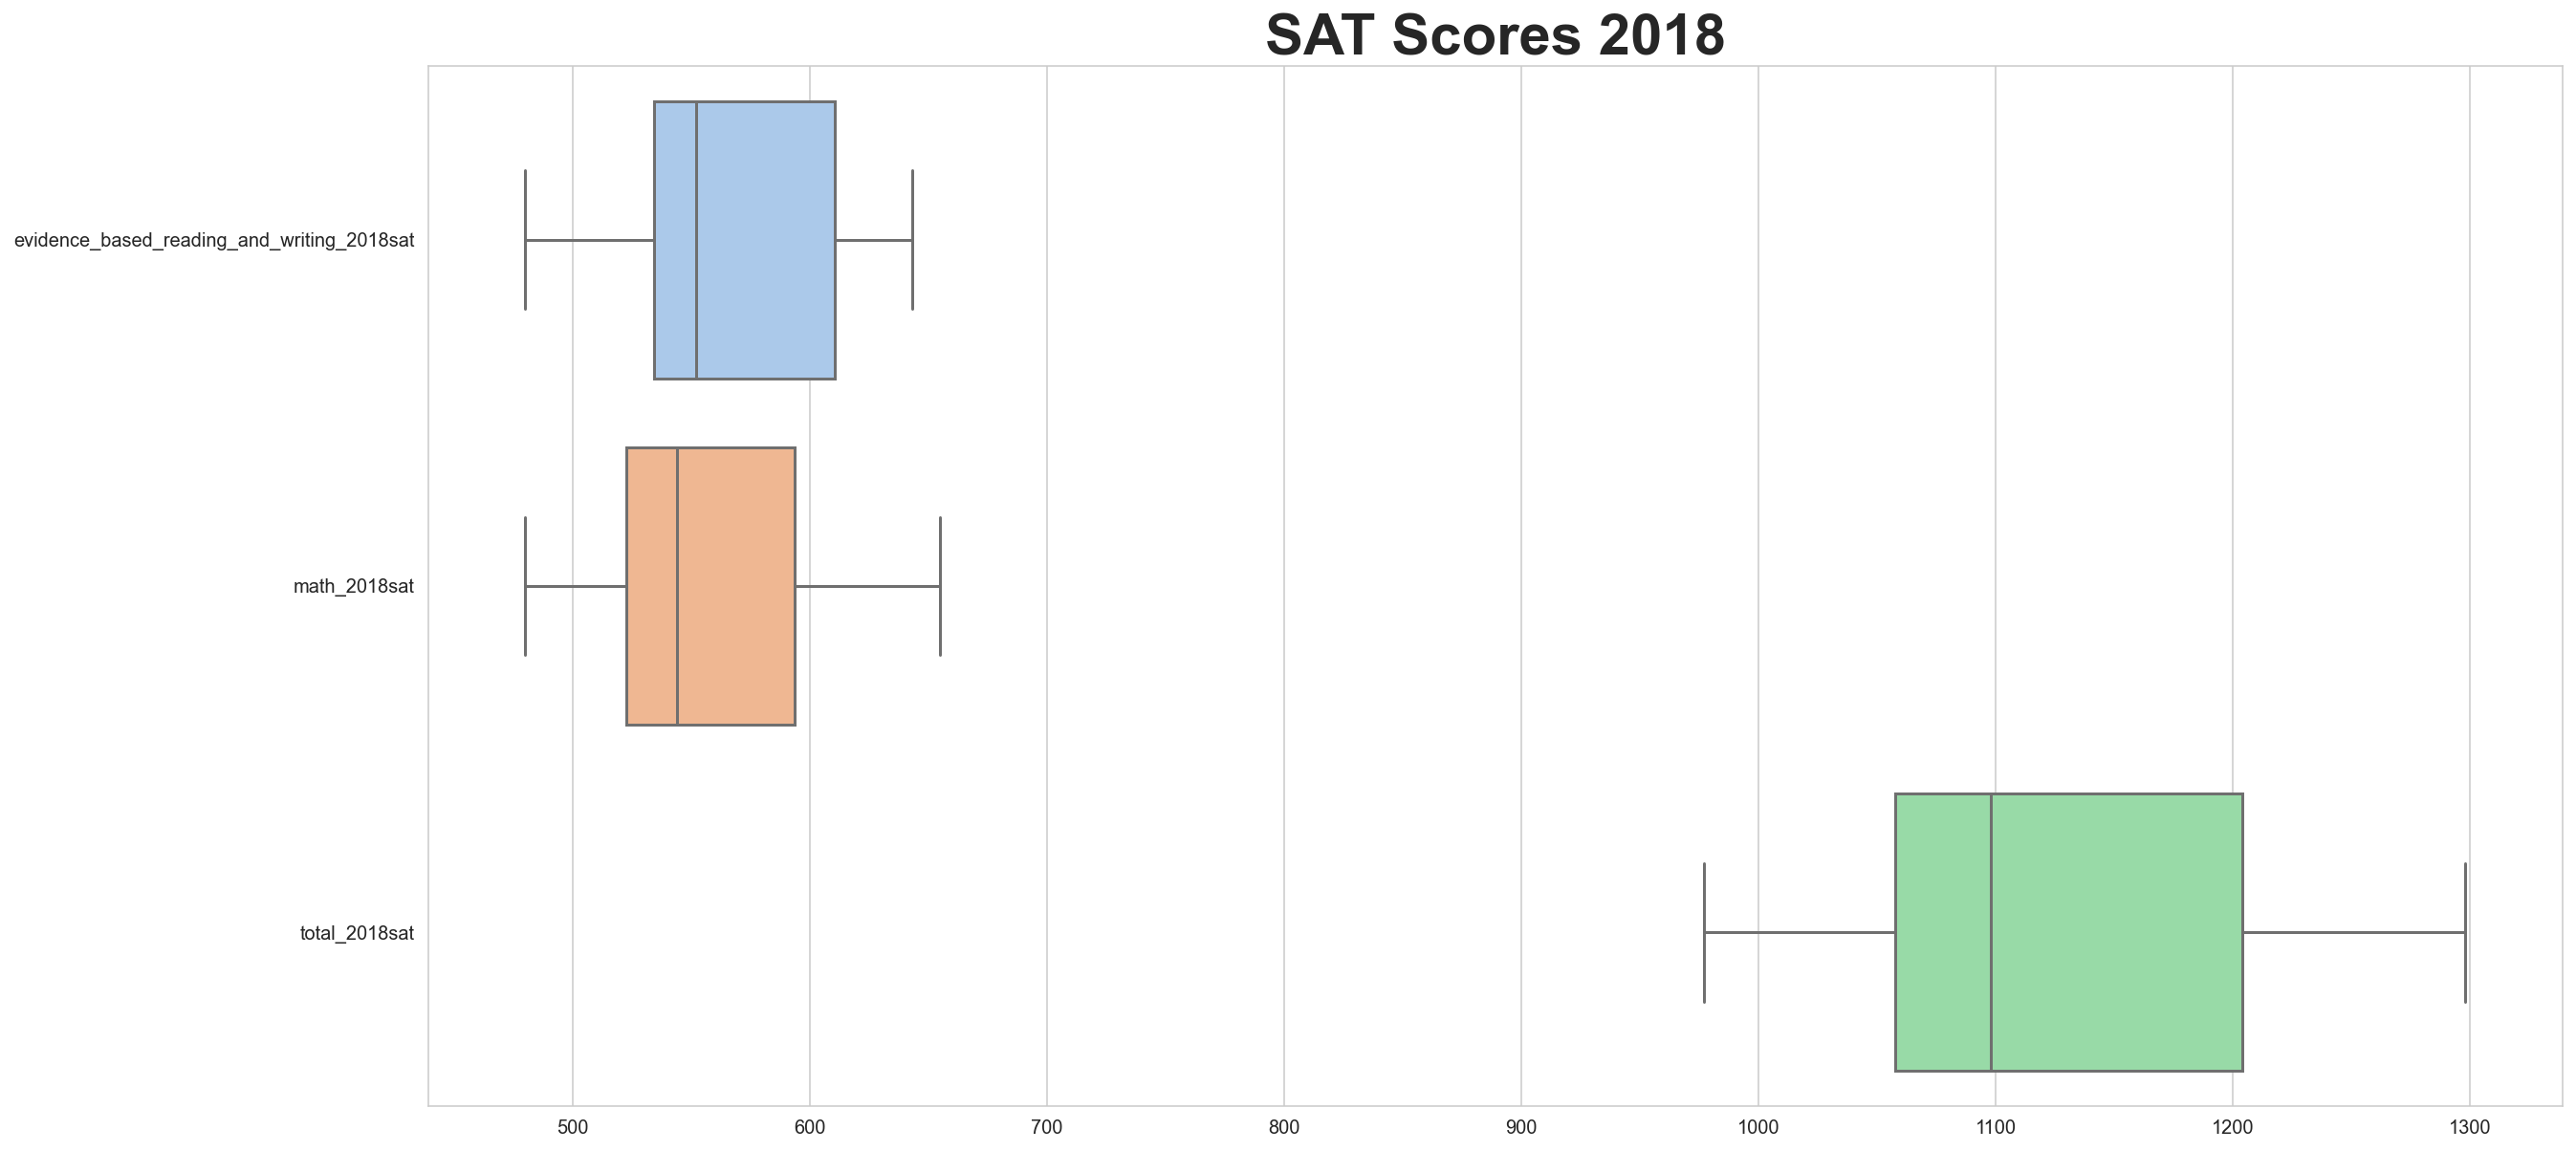

In [55]:
plt.figure(figsize=(20,10))
plt.title("SAT Scores 2018",fontweight="bold",fontsize=30)
sns.boxplot(data=final_df[['evidence_based_reading_and_writing_2018sat','math_2018sat','total_2018sat']],orient='h',palette='pastel');

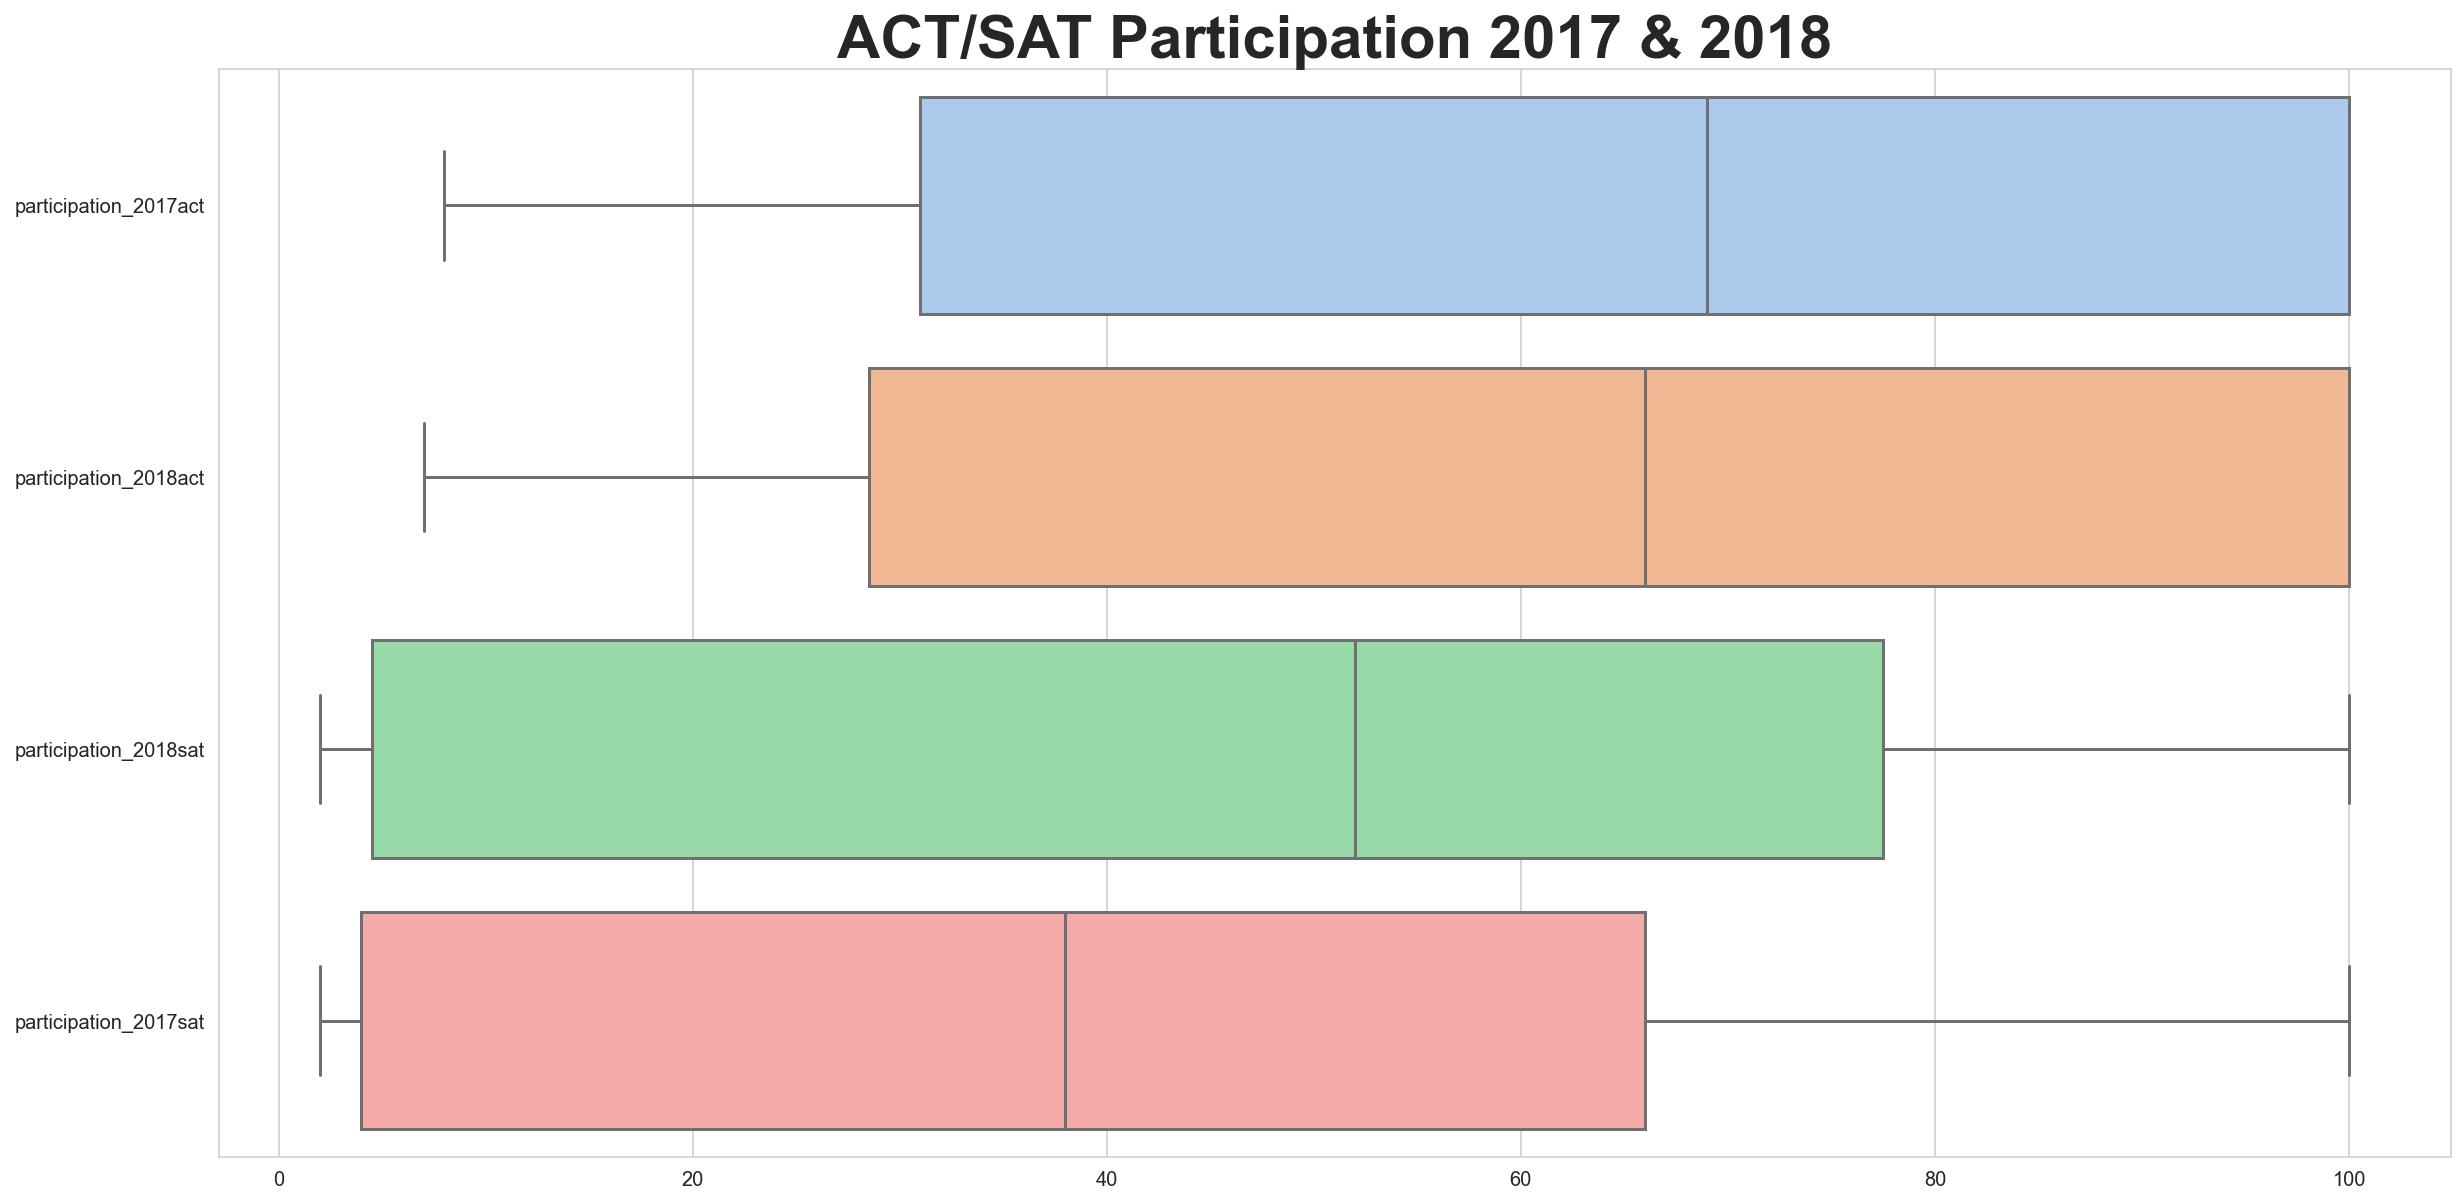

In [56]:
plt.figure(figsize=(20,10))
plt.title("ACT/SAT Participation 2017 & 2018",fontweight="bold",fontsize=30)
sns.boxplot(data=final_df[['participation_2017act','participation_2018act','participation_2018sat','participation_2017sat']],orient='h',palette='pastel');

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

In [116]:
participation_comparison = [('ACT 2017 Participation',final_df['participation_2017act'].mean()),
                            ('ACT 2018 Participation',final_df['participation_2018act'].mean()),
                            ('SAT 2017 Participation',final_df['participation_2017sat'].mean()),
                            ('SAT 2018 Participation',final_df['participation_2018sat'].mean())]

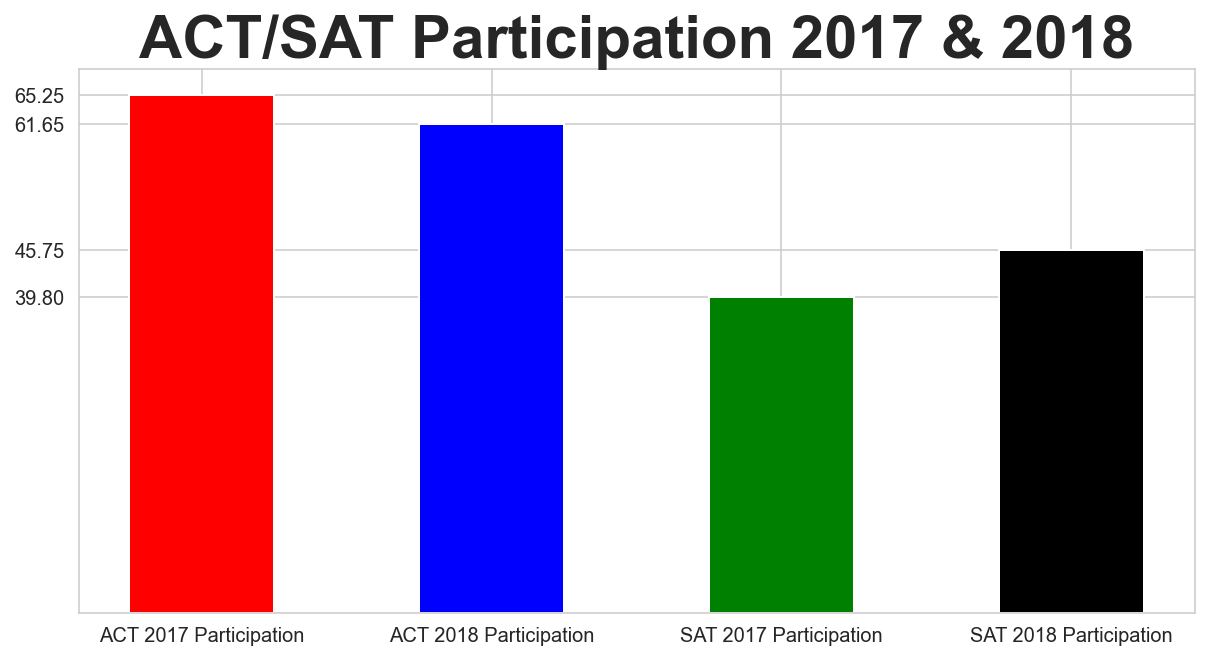

In [139]:
labels, ys = zip(*participation_comparison)
xs = np.arange(len(labels)) 
width = 1
plt.figure(figsize=(10,5))
plt.bar(xs, ys, width=0.5, align='center', color=['r','b','g','k'])
plt.title("ACT/SAT Participation 2017 & 2018",fontweight="bold",fontsize=30)
plt.xticks(xs, labels) #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys)
plt.savefig('../images/actsatpart.jpg')
plt.show();

In [57]:
participation_sat_df = final_df[(final_df['participation_2017sat'] - final_df['participation_2018sat'] > 10) | (final_df['participation_2017sat'] - final_df['participation_2018sat'] < -10)]

participation_sat_df = participation_sat_df[['state','participation_2017sat','participation_2018sat']]
participation_sat_df['participation_difference'] = participation_sat_df['participation_2018sat'] - participation_sat_df['participation_2017sat']

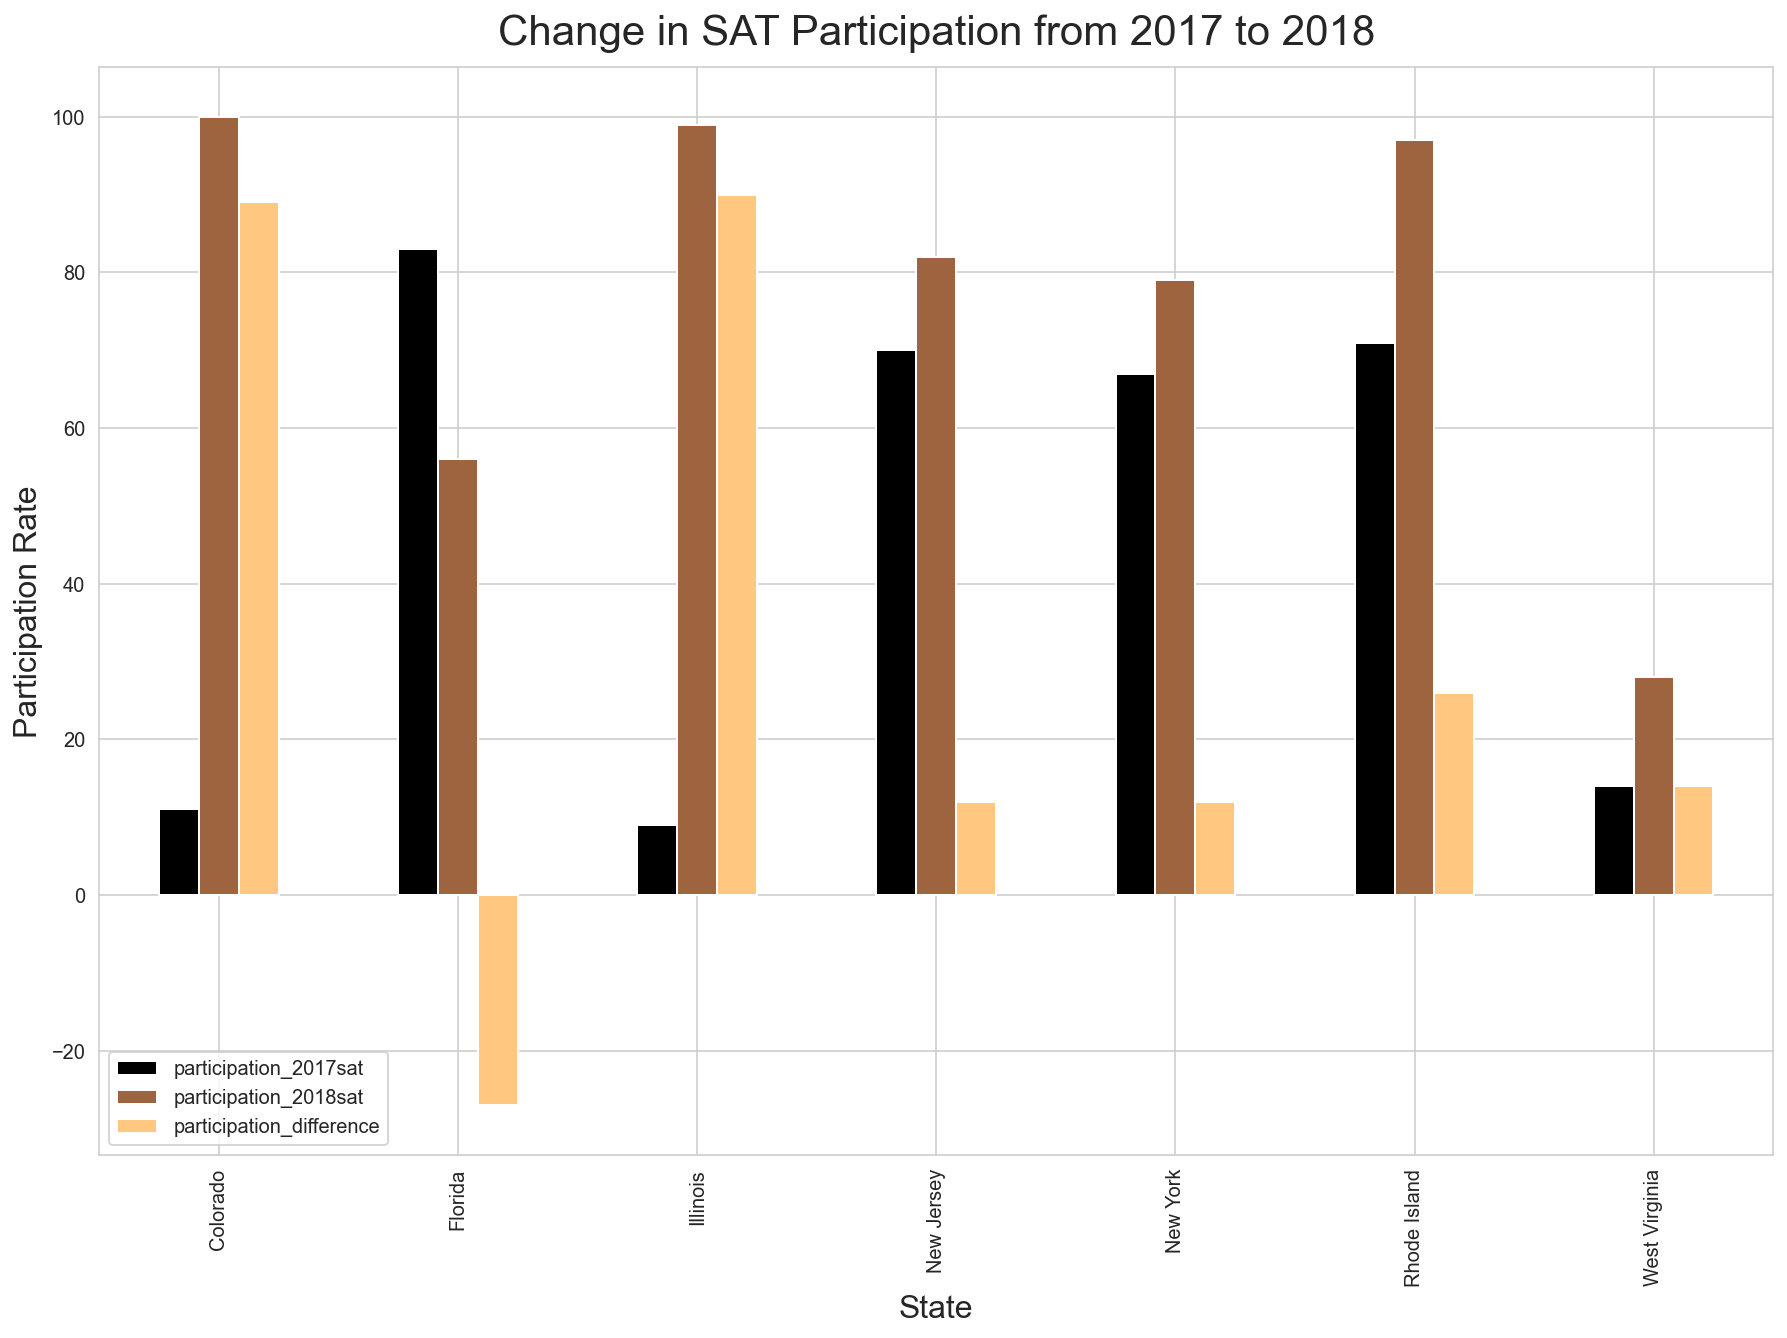

In [140]:
ax = participation_sat_df.plot(kind='bar', figsize=(15,10), x='state', colormap='copper');
ax.set_title('Change in SAT Participation from 2017 to 2018', fontsize=21, y=1.01);
ax.legend(loc=3);
ax.set_ylabel('Participation Rate', fontsize=16);
ax.set_xlabel('State', fontsize=16);
plt.savefig('../images/changesatpart.jpg');

I am interested to see the change in participation rate for the different states. Since there will be changes through all states, I will set the change in participation as above 10% to be worth noting.

The above figure shows the SAT participation for 2017 and 2018. Participation difference shows the change of the participation rate from 2017 to 2018. The negative bar shows that there is a drop whereas the positive bars show that there is an increase in participation.

In [59]:
participation_act_df = final_df[(final_df['participation_2017act'] - final_df['participation_2018act'] > 10) | (final_df['participation_2017act'] - final_df['participation_2018act'] < -10)]
participation_act_df = participation_act_df[['state','participation_2017act','participation_2018act']]
participation_act_df['participation_difference'] = participation_act_df['participation_2018act'] - participation_act_df['participation_2017act']

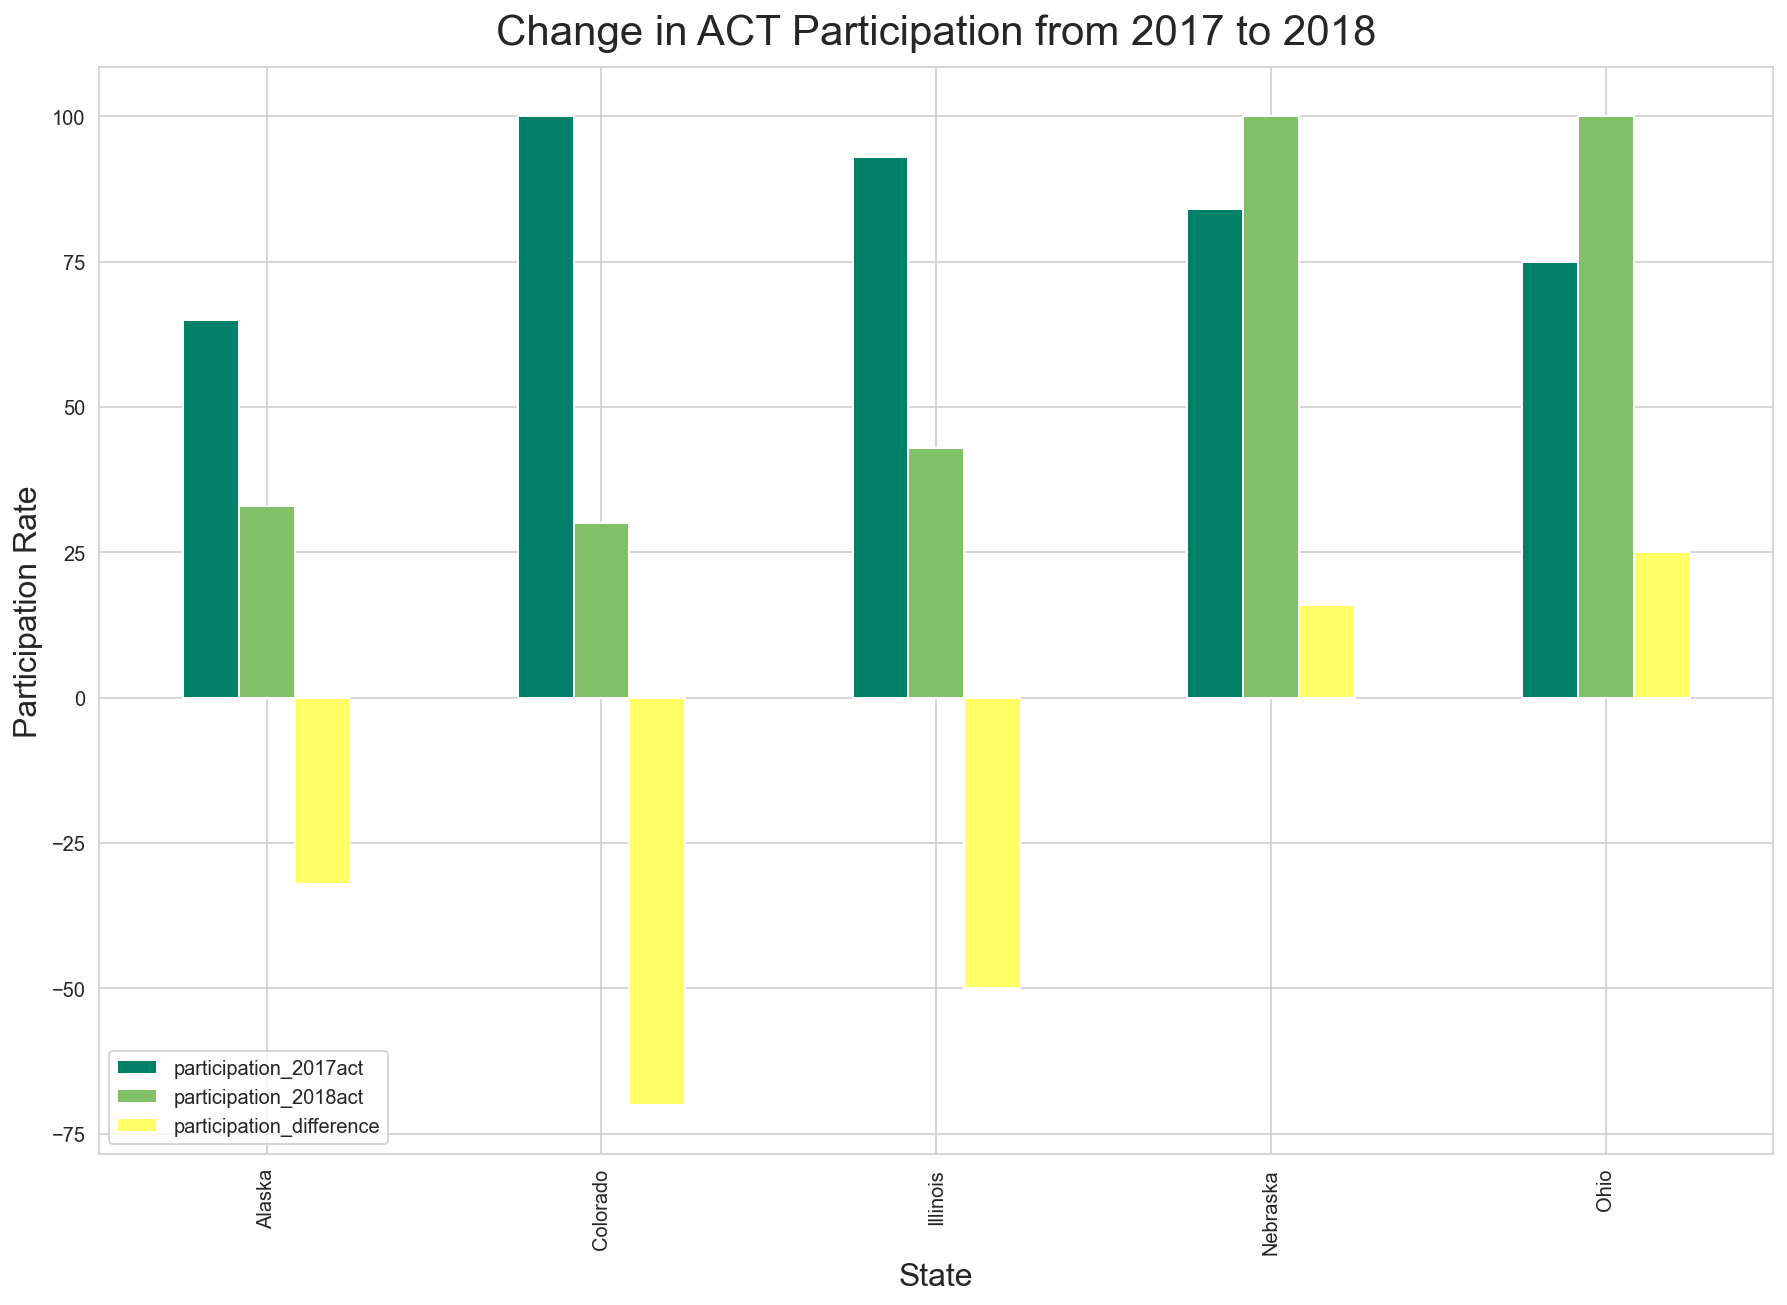

In [141]:
ax = participation_act_df.plot(kind='bar', figsize=(15,10), x='state', colormap='summer');
ax.set_title('Change in ACT Participation from 2017 to 2018', fontsize=21, y=1.01);
ax.legend(loc=3);
ax.set_ylabel('Participation Rate', fontsize=16);
ax.set_xlabel('State', fontsize=16);
plt.savefig('../images/changeactpart.jpg');

Next is the ACT participation from 2017 to 2018. I'm also cutting off the difference at above 10% change from 2017 to 2018.

From the above figure, the participation difference shows the change of the participation rate from 2017 to 2018. The negative bar shows that there is a drop whereas the positive bars show that there is an increase in participation.

Zeroing into the states that have a change in trend would allow me to focus my attention to account for these changes, whether there were some sort of policy change or simply changing perceptions that made up for the change.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

|Variable|Normally Distributed|Description|
|---|---|---|
|**participation_2017sat**|No|Shape of distribution is assymmetrical with a right skew. Although the mean and median values (39.8,38.0) are close, normal distribution has an equal mean and meadian, which gives it a symmetrical shape. The high standard deviation (32.14) suggests that the shape of the distribution is very steep|
|**evidence_based_reading_and_writing_2017sat**|No|Bimodal shape, with two peaks. Although the mean and median are close, normal distribution has an equal mean and meadian, which gives it a symmetrical shape. The relatively low standard deviation (45.67) also suggests that the distribution curve is less steep|
|**math_2017sat**|No|Left skewed shape. The mean and median scores are close (547.63,548.0), however the skewness of shape makes it not normal.|
|**total_2017sat**|No|Bimodal shaped. with two peaks. Mean and median also diverges (1126.09, 1107.0). The standard deviation of 92.49 suggests that the curve is less steep.|
|**participation_2018sat**|No|Right skewed shape. The mean and median (45.75,52.0) suggests that they are not symmetrical. The high standard deviation (37.31) suggests that the curve is steep.|
|**evidence_based_reading_and_writing_2018sat**|No|Bimodal shape. The mean and median (563.69, 552.0) suggests that they are not symmetrical. The standard deviation (47.50) suggests that the curve is less steep.|
|**math_2018sat**|No|Unimodal shaped. The mean and median (556.24,544.0) suggests that the distribution is not symmetrical. The standard deviation (47.77) suggests that the curve is steep. Although it looks approximately normal by shape, the mean and median shows that it is not.|
|**total_2018sat**|No|Bimodal shape. The mean and median (1120.02, 1098.0), although close, suggests that the distribution is not symmetrical. The standard deviation (94.16) suggests that the curve of the distribution is steep.|
|**participation_2017act**|No|Left skew unimodal shaped. The mean and median (65.25, 69.0) suggests that the distribution is not symmetrical. The standard deviation (32.14) suggests that the curve is moderately steep.|
|**english_2017act**|No|Unimodal shaped with a right skew. The mean and median (20.93, 20.7), although close, does not mean that it is normally distributed due to the shape. The standard deviation (2.35) suggests that the curve is relatively steep.|
|**math_2017act**|No |Unimodal shaped. The mean and median (21.18, 20.9) suggests that the distribution is not symmetrical. The standard deviation (1.98) suggests that the distribution curve is steep.|
|**reading_2017act**|Approximately Normal|Unimodal shape. The mean and median (22.01, 21.8) is close and the curve looks approximately normal. The standard deviation (2.07) suggests that the curve of distribution is steep. The shape,mean and median may suggest that the distribution is approximately normal.|
|**science_2017act**|No|Unimodal shape with a left skew. The mean and median (21.04,21.3), although close, is not a good approximation for normality due to the shape. The standard deviation (3.18) suggest that the curve of distribution is relatively steep.|
|**composite_2017act**|Approximately Normal|Unimodal shaped with a uniformly spreaded peak. The mean and median (21.52,21.4) is close and the curve looks approximately normal. The standard deviation (2.02) suggests that the curve of the distribution is relatively steep|
|**participation_2018act**|No|Bimodal shaped. The mean and median (61.65,66.0) suggests that the distribution is not symmetrical. The standard deviation (34.08) suggests that the curve of the distribution is moderately steep|
|**english_2018act**|No|ACT|Bimodal shape. The mean and median (20.99,20.2), although close, does not reflect the shape that is not normally distributed. The standard deviation (2.45) suggests that the curve is steep.|
|**math_2018act**|No| Bimodal shaped. The mean and median (21.13, 20.7), although close, does not reflect normality due to the shape. The standard deviation (2.04) suggests that the curve of distribution is steep.|
|**reading_2018act**|No|Bimodal shape. The mean and median (22.02, 21.6),although close, does not mean normality due to the shape. The standard deviation (2.17) suggests that the distribution curve is steep.|
|**science_2017act**|No| Bimodal shaped. The mean and median (21.35, 21.1), although close, does not reflect the shape of the distribution. The standard deviation (1.87) suggests that the distribution curve is steep.|
|**composite_2018act**|No|Unimodal shape with a right skew. The mean and median (21.49, 21.3), although close, does not reflect normality due to the shape of the distribution. The standard deviation (2.11) suggests that the curve is steep.|

In [61]:
final_df.describe()

,participation_2017act,english_2017act,math_2017act,reading_2017act,science_2017act,composite_2017act,participation_2017sat,evidence_based_reading_and_writing_2017sat,math_2017sat,total_2017sat,participation_2018act,english_2018act,math_2018act,reading_2018act,science_2018act,composite_2018act,participation_2018sat,evidence_based_reading_and_writing_2018sat,math_2018sat,total_2018sat
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,39.803922,569.117647,547.627451,1126.098039,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,35.276632,45.666901,84.909119,92.494812,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,2.000000,482.000000,52.000000,950.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,4.000000,533.500000,522.000000,1055.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,38.000000,559.000000,548.000000,1107.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,66.000000,613.000000,599.000000,1212.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,644.000000,651.000000,1295.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000,100.000000,643.000000,655.000000,1298.000000



#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer:

The trend in the dataframes suggests that there may be some approximately normal distributions from the variables.

Does This Assumption Hold for:
    
    - Math
    - Reading
    - Rates
    
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

**Math Scores**
The assumption does not hold true for math scores in ACT and SAT, from 2017 to 2018. Although the mean and median may be close, th shape of the histograms from the variables are not symmetrical. This is especially true in SAT 2017 Math scores, where there is a right skew.

**Reading Scores**
The assumption is also not true for the reading scores in ACT and SAT, from 2017 to 2018. The distribution produces a bimodal shape throughout all 4 histograms, suggesting that the distribution is not normal.

**Participation Rates**
The assumption is not true for the participation rates of ACT and SAT in 2017 and 2018. The distribution produces left and right skew with a bimodal shape.


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

The participation rate given here are aggregated data at state level. Aggregating data can be useful in pointing out trends at a moremicro level. For example, having the data aggregated at state level allows us to see the change in the participation rate and scrutinise on the the probable causes at state level. However, this may not hold true when we aggregate at a more macro level, for example the national average of ACT Participation. National mean decreases from 2017 to 2018. However, that is due to the shift in a few state such as Colorado, Illinois and Alaska, causing a disproportionate change whereas there exists states pulling an increase in participation from 2017. Such an aggregation may cause these facts to be missed out.

Granular data is a better way of making an inference of the population. Given the participation rates of the data, a granular data would probably give variables such as participation in both SAT and ACT, age of participant, etc. These variables would give a bigger insights to make a more informed inference towards the population.

In my opinion, it would not make sense to conduct statistical inference, firstly, due to the nature of the data (being an aggregation instead of granular) and that the majority of the variable are not normally distributed. However, the data still allows us to identify trends to make inferences, albeit only at a slightly more micro level.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer:

We are not able to compare the student scores simply as the data is aggregated and that we are not able to identify scores of individual students who scored higher in SAT math as compared to ACT math. The statement, although may hold some statistical significance, cannot be proved with the data available.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

Since the variables are not normally distributed, I would not be conducting any hypothesis tests on the change in participation rate mean between the 2017 and 2018 dataframes.

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

The 3 states I am interested in are Colorado, Illinois and Ohio.

For Colorado, there is a drop in ACT participation from 100% to 30% from 2017 to 2018 whereas their SAT participation increased from 11% to 100% from 2017 to 2018. The numbers signals a big shift in terms of ACT vs SAT participation. The article [here](https://www.washingtonpost.com/education/2018/10/23/sat-reclaims-title-most-widely-used-college-admission-test/) states that the Colorado has made SAT mandatory for students in 2017 instead of ACT. This change in policy was the cause in the drastic shift in participation for both ACT and SAT from 2017 to 2018.

The same policy also is true for Illinois when they implemented SAT as the standardised state exam. SAT participation rose from 9% in 2017 to 99% in 2018. The change is policy has made school districts shift their implementation from ACT to SAT, causing a drop in ACT participation from 93% in 2017 to 43% in 2018. Although ACT exam has retained some participation rate, the drastic change is mainly caused by the policy implementation.

For Ohio, it is an interesting case. The state introduced a [ either SAT or ACT](https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors) for all juniors taking the exam, excepth the writing exam which the student will need to pay for the test. The free exam initiative has pushed the participation rate of ACT from 75% in 2017 to 100% in 2018. Interestingly, although the exam fee is funded for either SAT or ACT, students overwhelmingly chose ACT over SAT in Ohio. Although there is an increase in SAT participation, (from 12% to 18%) the trend suggests that ACT is popular amongst the schools in Ohio.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

From the data that we have explored and trends that appeared by looking at the data, we can conclude that participation rate is an influence of the state's policy. From making it mandatory or supporting the financial aspect and making it accessible to students, these policies have mada a positive impact on the participation rate.

I would also like to highlight Iowa from the dataframe. Iowa reflects the lowest total participation in 2017 (participation ACT 2017 + participation SAT 2017) and 2018 (participation ACT 2018 + participation SAT 2018) with a total participation rate of 69% and 71% respectively.

Simply basing my interpretation based on the 3 states i have mentioned before, my recommendations towards Iowa would be to also implement such a policy. Having a state level intervention, by either making it accessible or simply mandating it upon students will have the outcome desired, which is to boost the participation rate of the students in the standardised test such as SAT and ACT.

Although the recommendation would be straightforward, it is also interesting to note that some colleges are dropping [ACT and SAT requirements for admission during this coronavirus period](https://www.nytimes.com/article/sat-act-test-optional-colleges-coronavirus.html#:~:text=the%20main%20story-,More%20Colleges%20Are%20Waiving%20SAT%20and%20ACT%20Requirements,testing%20requirements%20for%202021%20applicants.&text=They%20are%20a%20rite%20of,students%3A%20the%20SAT%20and%20ACT.). The waiver might be temporary and for some, extended periods. As we navigate through the current coronavirus, it would be probable that the recommendation would cease to be relevant. Perhaps as schools try to achieve a better education for the students, a common ground can be found soon to be able to push students into colleges in the US.

